<a href="https://colab.research.google.com/github/GuillaumeMagnette/Stage_Tritons/blob/master/Impl%C3%A9mentation_Triplet_loss_stage2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Keras implementation of Triplet Loss

In [0]:
tf.enable_eager_execution()

NameError: ignored

# Import datasets

In [0]:
#!pip install git+https://github.com/tensorflow/docs
!curl -s https://packagecloud.io/install/repositories/github/git-lfs/script.deb.sh | sudo bash
!sudo apt-get install git-lfs
!git lfs install
!git clone https://github.com/GuillaumeMagnette/Stage_Tritons.git

In [0]:
#!pip install numba
!pip install kaggle

#from google.colab import files
#files.upload()
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/

! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets list

In [0]:
! kaggle datasets download -d guillaumemagnette/datasetfinal/bf71bf5fd008dbdc0533720633d31a9dc98c7aea3bf59faa0eb4c14a428b9936

In [0]:
!unzip -q /content/Stage_Tritons/Database_newts.zip
!unzip -q /content/Stage_Tritons/aug_database_for_seg.zip
!unzip -q /content/Stage_Tritons/datasetFinal.zip

Useful when I was using colab to store my datasets, do not run this cell as it uses my google drive

In [0]:

from google.colab import drive
!rm -rf /content/content
drive.mount('/content/drive')
!unzip -q /content/drive/"My Drive"/Stage/Stage_cropped.zip
#!unzip -q /content/drive/"My Drive"/Stage/databaseAugSeg.zip
#!unzip -q /content/drive/"My Drive"/Stage/Database_newts.zip
#!unzip -q /content/drive/"My Drive"/Stage/datasetFinal.zip

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


# Import Tensorflow 2 and scikit-image modules.
Do not run this cell to run the Mask R-CNN part below, as it was written with TF1

In [0]:


try:
  %tensorflow_version 2.x
except:
  pass

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import backend
from tensorflow.keras import layers
from tensorflow.keras import datasets
from tensorflow.keras import Sequential
from tensorflow.keras.preprocessing.image import save_img

from numpy import linalg as LA

import urllib

#import tensorflow_docs as tfdocs
#import tensorflow_docs.plots

import tensorflow_datasets as tfds

import PIL.Image

import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (12, 5)

import skimage
from skimage import measure
import numpy as np
from skimage.io import imread, imsave
import matplotlib.pyplot as plt
from skimage import transform
from skimage.transform import rotate, AffineTransform, swirl, resize
from skimage.util import random_noise
from skimage.filters import gaussian
from skimage import io, img_as_float, img_as_float64
from scipy import ndimage
from pathlib import Path

from random import random, uniform

import os
import pathlib
import shutil
import pandas as pd
import cv2
from google.colab.patches import cv2_imshow


import numba
from numba import jit


In [0]:
tf.config.experimental.list_physical_devices('GPU')

[]

# Segmentation of newts using a Mask R-CNN trained in the notebook "Mask-RCNN". 


import the preaugmented dataset generated from the method preaugment

In [0]:


from google.colab import drive
!rm -rf /content/content
drive.mount('/content/drive')
#!cp '/content/drive/My Drive/slim.zip' slim.zip
!unzip -q /content/drive/"My Drive"/Stage/Database_newts.zip
!unzip -q /content/drive/"My Drive"/Stage/databaseAug.zip
#!unzip -q /content/drive/"My Drive"/Stage/aug_database_for_seg.zip

`%tensorflow_version` only switches the major version: 1.x or 2.x.
You set: `1.4`. This will be interpreted as: `1.x`.


TensorFlow 1.x selected.
     |████████████████████████████████| 337kB 2.8MB/s 
  Found existing installation: Keras 2.3.1
    Uninstalling Keras-2.3.1:
      Successfully uninstalled Keras-2.3.1
Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
""" the Mask RCNN has been implemented with Tensorflow 1.x
    Restart the runtime Tensorflow 2.x were imported.
"""

try:
  %tensorflow_version 1.4
except:
  pass

import tensorflow as tf
#tf.logging.set_verbosity(tf.logging.ERROR)
!pip install keras==2.2.5

!git clone https://github.com/matterport/Mask_RCNN.git

import os
import sys
import json
import datetime
import numpy as np
import skimage.draw

import os
import sys
import itertools
import math
import logging
import json
import re
import random
from collections import OrderedDict
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.lines as lines
from matplotlib.patches import Polygon


# Root directory of the project
ROOT_DIR = os.path.abspath("/content/Mask_RCNN")

# Import Mask RCNN
sys.path.append(ROOT_DIR)  # To find local version of the library
# Root directory of the project
#ROOT_DIR = os.getcwd()
#if ROOT_DIR.endswith("samples/balloon"):
    # Go up two levels to the repo root
   # ROOT_DIR = os.path.dirname(os.path.dirname(ROOT_DIR))

# Import Mask RCNN
#sys.path.append(ROOT_DIR)

import mrcnn.utils
import mrcnn.visualize as visualize
from mrcnn.visualize import display_images
import mrcnn.model as modellib
from mrcnn.model import log



%matplotlib inline

Using TensorFlow backend.


In [0]:
""" Define useful paths and download the pretrained weights of the Mask RCNN """
# Root directory of the project
ROOT_DIR = os.path.abspath("/content/Mask_RCNN")

# Import Mask RCNN
sys.path.append(ROOT_DIR)  # To find local version of the library
from mrcnn.config import Config
from mrcnn import model as modellib, utils

# Path to trained weights file
COCO_WEIGHTS_PATH = os.path.join(ROOT_DIR, "mask_rcnn_coco.h5")

# Download COCO trained weights from Releases if needed
if not os.path.exists(COCO_WEIGHTS_PATH):
    utils.download_trained_weights(COCO_WEIGHTS_PATH)


# Directory to save logs and model checkpoints, if not provided
# through the command line argument --logs
DEFAULT_LOGS_DIR = os.path.join(ROOT_DIR, "logs")


... done downloading pretrained model!


In [0]:
############################################################
#  Configurations
############################################################


class NewtsConfig(Config):
    """Configuration for training on the toy  dataset.
    Derives from the base Config class and overrides some values.
    """
    # Give the configuration a recognizable name
    NAME = "newt"

    # We use a GPU with 12GB memory, which can fit two images.
    # Adjust down if you use a smaller GPU.
    IMAGES_PER_GPU = 2

    # Number of classes (including background)
    NUM_CLASSES = 1 + 1  # Background + newts

    # Number of training steps per epoch
    STEPS_PER_EPOCH = 100

    # Skip detections with < 90% confidence
    DETECTION_MIN_CONFIDENCE = 0.9


In [0]:
############################################################
#  Dataset
############################################################

class NewtsDataset(utils.Dataset):

    def load_newts(self, dataset_dir, subset):
        """Load a subset of the newts dataset.
        dataset_dir: Root directory of the dataset.
        subset: Subset to load: train or val
        """
        # Add classes. We have only one class to add.
        self.add_class("newt_pattern", 1, "newt_pattern")

        # Train or validation dataset?
        #assert subset in ["train", "test"]
        #dataset_dir = os.path.join(dataset_dir, subset)

        # Load annotations
        # VGG Image Annotator (up to version 1.6) saves each image in the form:
        # { 'filename': '28503151_5b5b7ec140_b.jpg',
        #   'regions': {
        #       '0': {
        #           'region_attributes': {},
        #           'shape_attributes': {
        #               'all_points_x': [...],
        #               'all_points_y': [...],
        #               'name': 'polygon'}},
        #       ... more regions ...
        #   },
        #   'size': 100202
        # }
        # We mostly care about the x and y coordinates of each region
        # Note: In VIA 2.0, regions was changed from a dict to a list.
        #/content/images_annotated/via_export_newts.json
        annotations = json.load(open(os.path.join(dataset_dir, "via_export_newts_pattern.json")))
        annotations = list(annotations.values())  # don't need the dict keys

        # The VIA tool saves images in the JSON even if they don't have any
        # annotations. Skip unannotated images.
        annotations = [a for a in annotations if a['regions']]

        # Add images
        for a in annotations:
            # Get the x, y coordinaets of points of the polygons that make up
            # the outline of each object instance. These are stores in the
            # shape_attributes (see json format above)
            # The if condition is needed to support VIA versions 1.x and 2.x.
            if type(a['regions']) is dict:
                polygons = [r['shape_attributes'] for r in a['regions'].values()]
            else:
                polygons = [r['shape_attributes'] for r in a['regions']] 

            # load_mask() needs the image size to convert polygons to masks.
            # Unfortunately, VIA doesn't include it in JSON, so we must read
            # the image. This is only managable since the dataset is tiny.
            image_path = os.path.join(dataset_dir, a['filename'])
            image = skimage.io.imread(image_path)
            height, width = image.shape[:2]

            self.add_image(
                "newt_pattern",
                image_id=a['filename'],  # use file name as a unique image id
                path=image_path,
                width=width, height=height,
                polygons=polygons)

    def load_mask(self, image_id):
        """Generate instance masks for an image.
       Returns:
        masks: A bool array of shape [height, width, instance count] with
            one mask per instance.
        class_ids: a 1D array of class IDs of the instance masks.
        """
        # If not a newt dataset image, delegate to parent class.
        image_info = self.image_info[image_id]
        if image_info["source"] != "newt_pattern":
            return super(self.__class__, self).load_mask(image_id)

        # Convert polygons to a bitmap mask of shape
        # [height, width, instance_count]
        info = self.image_info[image_id]
        mask = np.zeros([info["height"], info["width"], len(info["polygons"])],
                        dtype=np.uint8)
        for i, p in enumerate(info["polygons"]):
            # Get indexes of pixels inside the polygon and set them to 1
            rr, cc = skimage.draw.polygon(p['all_points_y'], p['all_points_x'])
            mask[rr, cc, i] = 1

        # Return mask, and array of class IDs of each instance. Since we have
        # one class ID only, we return an array of 1s
        return mask.astype(np.bool), np.ones([mask.shape[-1]], dtype=np.int32)

    def image_reference(self, image_id):
        """Return the path of the image."""
        info = self.image_info[image_id]
        if info["source"] == "newt_pattern":
            return info["path"]
        else:
            super(self.__class__, self).image_reference(image_id)



In [0]:
config = NewtsConfig()
NEWTS_DIR = os.path.join(ROOT_DIR, "pattern_annotated")

In [0]:

# Load dataset
# Get the dataset from the releases page
# https://github.com/matterport/Mask_RCNN/releases
dataset = NewtsDataset()
#dataset.load_newts(IMAGE_DIR, "train")
dataset.load_newts(NEWTS_DIR, "train")
# Must call before using the dataset
dataset.prepare()

print("Image Count: {}".format(len(dataset.image_ids)))
print("Class Count: {}".format(dataset.num_classes))
for i, info in enumerate(dataset.class_info):
    print("{:3}. {:50}".format(i, info['name']))

Image Count: 80
Class Count: 2
  0. BG                                                
  1. newt_pattern                                      


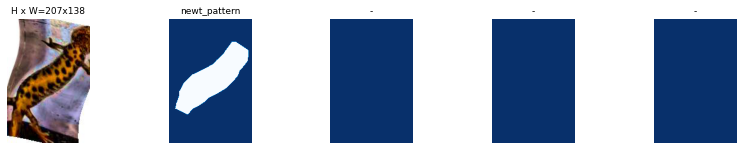

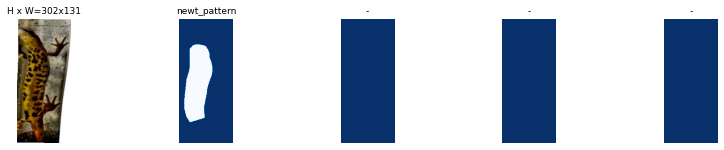

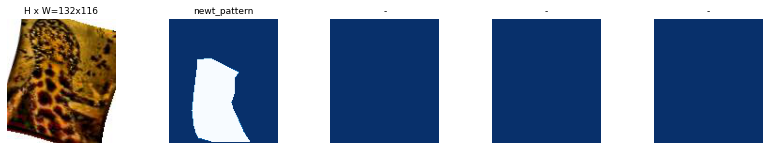

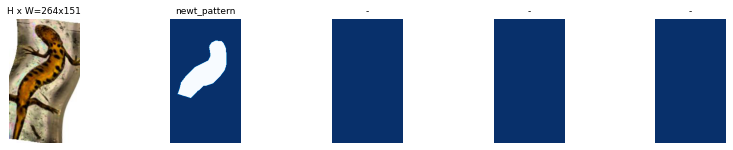

In [0]:
# Load and display random samples
image_ids = np.random.choice(dataset.image_ids, 4)
for image_id in image_ids:
    image = dataset.load_image(image_id)
    mask, class_ids = dataset.load_mask(image_id)
    visualize.display_top_masks(image, mask, class_ids, dataset.class_names)

image_id  44 /content/Mask_RCNN/pattern_annotated/Bascha_P01_T06_K20_U_Adult_8012_20190719220609.jpg
image                    shape: (181, 65, 3)          min:    0.00000  max:  255.00000  uint8
mask                     shape: (181, 65, 1)          min:    0.00000  max:    1.00000  bool
class_ids                shape: (1,)                  min:    1.00000  max:    1.00000  int32
bbox                     shape: (1, 4)                min:    0.00000  max:  152.00000  int32


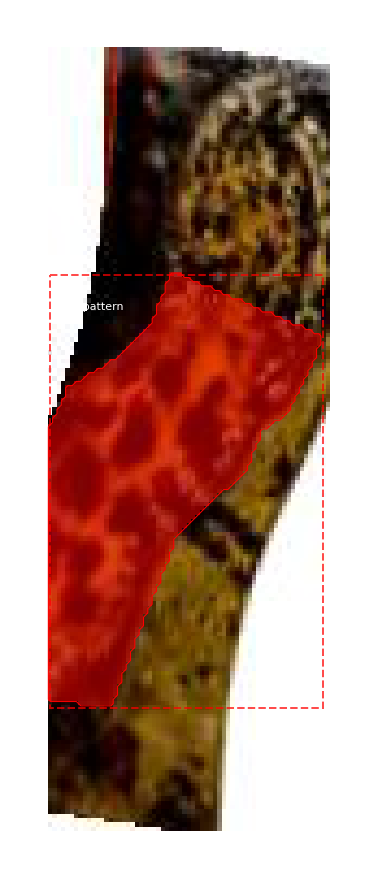

In [0]:
#Load random image and mask.
image_id = random.choice(dataset.image_ids)
image = dataset.load_image(image_id)
mask, class_ids = dataset.load_mask(image_id)
# Compute Bounding box
bbox = utils.extract_bboxes(mask)

# Display image and additional stats
print("image_id ", image_id, dataset.image_reference(image_id))
log("image", image)
log("mask", mask)
log("class_ids", class_ids)
log("bbox", bbox)
# Display image and instances
visualize.display_instances(image, bbox, mask, class_ids, dataset.class_names)

In [0]:
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

def train(model):
    """Train the model."""
    # Training dataset.
    dataset_train = NewtsDataset()
    dataset_train.load_newts(NEWTS_DIR, "train")
    dataset_train.prepare()

    # Validation dataset
    dataset_val = NewtsDataset()
    dataset_val.load_newts(NEWTS_DIR, "val")
    dataset_val.prepare()

    # *** This training schedule is an example. Update to your needs ***
    # Since we're using a very small dataset, and starting from
    # COCO trained weights, we don't need to train too long. Also,
    # no need to train all layers, just the heads should do it.
    print("Training network heads")
    #model.metrics_tensors = []
    model.train(dataset_train, dataset_val,
                learning_rate=config.LEARNING_RATE,
                epochs=60,
                layers='heads')

model = modellib.MaskRCNN(mode="training", config=config,
                                  model_dir=DEFAULT_LOGS_DIR)
weights_path = '/content/Mask_RCNN/logs/newt_pattern20200602T1046/mask_rcnn_newt_pattern_0040.h5'
model.load_weights(weights_path, by_name=True)




OSError: ignored

In [0]:
class InferenceConfig(NewtsConfig):
  """ Config to be used for the inferences """
            # Set batch size to 1 since we'll be running inference on
            # one image at a time. Batch size = GPU_COUNT * IMAGES_PER_GPU
            GPU_COUNT = 1
            IMAGES_PER_GPU = 1

config = NewtsConfig()
model = modellib.MaskRCNN(mode="inference", config=config,
                                  model_dir=DEFAULT_LOGS_DIR)
weights_path = '/content/drive/My Drive/Stage/mask_rcnn_newt_pattern_0060.h5'
model.load_weights(weights_path, by_name=True)

config = InferenceConfig()

# Utility methods for image augmentation, segmentation, cropping and proper datasets generation

In [0]:



#measure.label()
def extract_image(img_path):
  """ method used to extract the greatest region in the mask output of the 
  Mask RCNN. 
  """
  image = skimage.io.imread(img_path, plugin='matplotlib')
  # Detect objects
  r = model.detect([image], verbose=1)[0]

  

  # Extract the greatest region 
  try:
    labels_mask = measure.label(r['masks']) 
  except ValueError:  #raised if `y` is empty.
    print('no region found.')
    return image
   
  #print(labels_mask)                 
  #print(labels_mask.astype(np.uint8))
  #plt.imshow(np.squeeze(labels_mask.astype(np.uint8)))
  #regions = measure.regionprops(np.squeeze(labels_mask.astype(np.uint8)))
  try:
    regions = measure.regionprops(labels_mask)
  except ValueError:  #raised if `y` is empty.
    print("no region found.")
    return image
  regions.sort(key=lambda x: x.area, reverse=True)
  #print(regions)
  #print(len(regions))
  #if (len(regions) == 0):
    #return image
  if len(regions) > 1:
    for rg in regions[1:]:
        labels_mask[rg.coords[:,0], rg.coords[:,1]] = 0


  labels_mask[labels_mask!=0] = 1
  mask = labels_mask
  #plt.imshow(np.squeeze(mask))

  if mask.shape[-1] > 0:
    # We're treating all instances as one, so collapse the mask into one layer
    mask = (np.sum(mask, -1, keepdims=True) >= 1)
    img_extracted = np.where(mask, image, 255).astype(np.uint8)
    image = img_extracted/255
  
  white = np.array([1, 1, 1])
  mask = np.abs(image - white).sum(axis=2) < 0.05

  # Find the bounding box of those pixels
  coords = np.array(np.nonzero(~mask))
  top_left = np.min(coords, axis=1)
  bottom_right = np.max(coords, axis=1)

  out = image[top_left[0]:bottom_right[0],
            top_left[1]:bottom_right[1]]


  # Save output
  #file_name = "newt_{:%Y%m%dT%H%M%S}.png".format(datetime.datetime.now())
  #skimage.io.imsave(file_name, img_extracted)
  

  return out


Processing 1 images
image                    shape: (229, 96, 3)          min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32


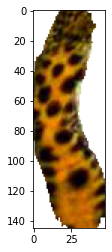

In [0]:
""" Here is an example of what extract_image can do """

img_path = '/content/databaseAug/train/KM00710/Bascha_P01_T03_K12_M_Adult_582_201905231743574.jpg'
image = skimage.io.imread(img_path, plugin='matplotlib')
plt.imshow(image)
plt.show()

image_extracted = extract_image(img_path)
plt.imshow(image_extracted)
plt.show()

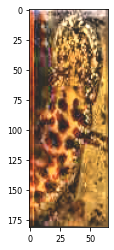

In [0]:
def random_brightness(rgb, show_result = False):
  """ Modify randomly the brightness of the input image """
  lab = skimage.color.rgb2lab(rgb)

  #plt.imshow(lab)
  brightness = uniform(-20, 20)
  
  #print(lab[:,:,0])
  lab[:,:,0] = lab[:,:,0] + brightness
  #print(np.max(lab[:,:,0]))
  #print(lab[:,:,0])
  rgb = skimage.color.lab2rgb(lab)
  if show_result:
    plt.imshow(rgb)
    plt.show()

  return rgb

imagePath = '/content/database/Bascha_P01_T06_K20_U_Adult_8012_20190719220609.jpg'
image = img_as_float(io.imread(imagePath))
#image = image/255
image = img_adapteq
lab = random_brightness(image, show_result=True)

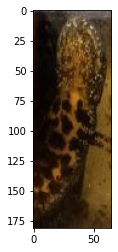

[[[0.80784314 0.75241763 0.73689849]
  [0.61568627 0.56691001 0.55529661]
  [0.63529412 0.61544406 0.61544406]
  ...
  [0.48235294 0.4387556  0.42080375]
  [0.41960784 0.37300961 0.35382211]
  [0.4627451  0.41198114 0.39595042]]

 [[0.45882353 0.37754274 0.35646995]
  [0.23137255 0.15064542 0.1371909 ]
  [0.21568627 0.16750431 0.16750431]
  ...
  [0.4627451  0.41820998 0.39987199]
  [0.42745098 0.38122786 0.36219481]
  [0.41568627 0.36168706 0.34179262]]

 [[0.47058824 0.38176677 0.3572643 ]
  [0.21176471 0.12564078 0.10841599]
  [0.16862745 0.10828636 0.1015818 ]
  ...
  [0.4745098  0.43053735 0.41243105]
  [0.45882353 0.41410085 0.39568563]
  [0.43921569 0.38637745 0.36691073]]

 ...

 [[0.10588235 0.05932764 0.03067859]
  [0.08235294 0.04606382 0.01340361]
  [0.07843137 0.04200289 0.00921725]
  ...
  [0.34509804 0.24533148 0.11349709]
  [0.34117647 0.24129585 0.10931074]
  [0.31764706 0.22785689 0.08419262]]

 [[0.10588235 0.05932764 0.03067859]
  [0.08235294 0.04606382 0.01340361]


In [0]:
def random_saturation(rgb, show_result = False):
  """ Modify randomly the saturation of the input image """
  hsv = skimage.color.rgb2hsv(rgb)

  #plt.imshow(hsv)
  saturation = uniform(-0.35, 0.35)
  
  #print(hsv[:,:,1])
  hsv[:,:,1] = hsv[:,:,1] + saturation
  #print(np.max(lab[:,:,0]))
  #print(hsv[:,:,1])
  rgb = skimage.color.hsv2rgb(hsv)

  if show_result:
    plt.imshow(rgb)
    plt.show()

  return rgb

imagePath = '/content/database/Bascha_P01_T06_K20_U_Adult_8012_20190719220609.jpg'
image = img_as_float(io.imread(imagePath))
#image = image/255
#image = img_adapteq
rgb = random_saturation(image, show_result=True)



/usr/local/lib/python3.6/dist-packages/skimage/exposure/exposure.py:181: UserWarning: This might be a color image. The histogram will be computed on the flattened image. You can instead apply this function to each color channel.
  hist, bin_centers = histogram(image, nbins)
/usr/local/lib/python3.6/dist-packages/skimage/exposure/exposure.py:181: UserWarning: This might be a color image. The histogram will be computed on the flattened image. You can instead apply this function to each color channel.
  hist, bin_centers = histogram(image, nbins)
/usr/local/lib/python3.6/dist-packages/skimage/exposure/exposure.py:181: UserWarning: This might be a color image. The histogram will be computed on the flattened image. You can instead apply this function to each color channel.
  hist, bin_centers = histogram(image, nbins)
/usr/local/lib/python3.6/dist-packages/skimage/exposure/exposure.py:181: UserWarning: This might be a color image. The histogram will be computed on the flattened image. You c

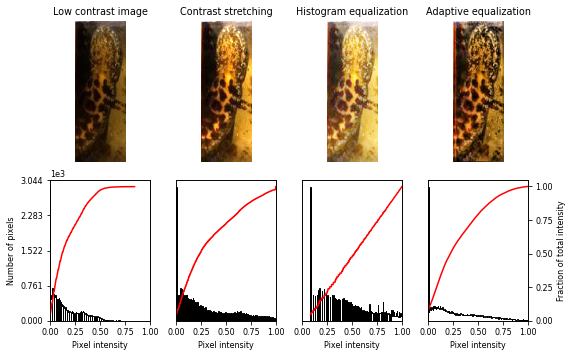

In [0]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

from skimage import data, img_as_float
from skimage import exposure


matplotlib.rcParams['font.size'] = 8


def plot_img_and_hist(image, axes, bins=256):
    """Plot an image along with its histogram and cumulative histogram.

    """
    image = img_as_float(image)
    ax_img, ax_hist = axes
    ax_cdf = ax_hist.twinx()

    # Display image
    ax_img.imshow(image, cmap=plt.cm.gray)
    ax_img.set_axis_off()

    # Display histogram
    ax_hist.hist(image.ravel(), bins=bins, histtype='step', color='black')
    ax_hist.ticklabel_format(axis='y', style='scientific', scilimits=(0, 0))
    ax_hist.set_xlabel('Pixel intensity')
    ax_hist.set_xlim(0, 1)
    ax_hist.set_yticks([])

    # Display cumulative distribution
    img_cdf, bins = exposure.cumulative_distribution(image, bins)
    ax_cdf.plot(bins, img_cdf, 'r')
    ax_cdf.set_yticks([])

    return ax_img, ax_hist, ax_cdf

""" the purpose of this code is to compare different contrast enhancing methods
"""
# Load an example image
img = data.moon()
img = image
# Contrast stretching
p2, p98 = np.percentile(img, (2, 98))
img_rescale = exposure.rescale_intensity(img, in_range=(p2, p98))

# Equalization
img_eq = exposure.equalize_hist(img)

# Adaptive Equalization
#img_adapteq[:,:,0] = exposure.equalize_adapthist(img[:,:,0], clip_limit=0.03)
#img_adapteq[:,:,1] = exposure.equalize_adapthist(img[:,:,1], clip_limit=0.03)
#img_adapteq[:,:,2] = exposure.equalize_adapthist(img[:,:,2], clip_limit=0.03)
img_adapteq = exposure.equalize_adapthist(img, clip_limit=0.03)

# Display results
fig = plt.figure(figsize=(8, 5))
axes = np.zeros((2, 4), dtype=np.object)
axes[0, 0] = fig.add_subplot(2, 4, 1)
for i in range(1, 4):
    axes[0, i] = fig.add_subplot(2, 4, 1+i, sharex=axes[0,0], sharey=axes[0,0])
for i in range(0, 4):
    axes[1, i] = fig.add_subplot(2, 4, 5+i)

ax_img, ax_hist, ax_cdf = plot_img_and_hist(img, axes[:, 0])
ax_img.set_title('Low contrast image')

y_min, y_max = ax_hist.get_ylim()
ax_hist.set_ylabel('Number of pixels')
ax_hist.set_yticks(np.linspace(0, y_max, 5))

ax_img, ax_hist, ax_cdf = plot_img_and_hist(img_rescale, axes[:, 1])
ax_img.set_title('Contrast stretching')

ax_img, ax_hist, ax_cdf = plot_img_and_hist(img_eq, axes[:, 2])
ax_img.set_title('Histogram equalization')

ax_img, ax_hist, ax_cdf = plot_img_and_hist(img_adapteq, axes[:, 3])
ax_img.set_title('Adaptive equalization')

ax_cdf.set_ylabel('Fraction of total intensity')
ax_cdf.set_yticks(np.linspace(0, 1, 5))

# prevent overlap of y-axis labels
fig.tight_layout()
plt.show()

this method was used for the segmentation algorithm, another method called augmentationImage is used to **generate a proper augmented dataset**

In [0]:
from sklearn import preprocessing


def pre_augmentation(img_path, preAug_path):
  """ augment each image from the base dataset so that the segmentation algorithm
  have to learn more robust features, to be able to accuratly extract newts in 
  low-quality images """

  path = Path(preAug_path)

  !rm -rf /content/databaseAug

  os.makedirs(preAug_path)
  for img_name in os.listdir(img_path):
    
    imagePath = img_path + '/' + img_name

    if os.path.isfile(imagePath):

      image = img_as_float(io.imread(imagePath))
      image = exposure.equalize_adapthist(image, clip_limit=0.03)
      image = random_saturation(image, show_result=False)
      image = random_brightness(image, show_result=False)
      print(np.max(image))
      print(np.min(image))
      image = image*255
      #plt.imshow(image)
      #plt.show()
      
      shear = uniform(-.1, .1)
      #print(shear)
      tfr = AffineTransform(shear=shear)
      sheared = transform.warp(image, tfr, order=1, preserve_range=True,mode='constant', cval=255)
      #sheared_fig = plot_side_by_side(img, sheared, 'Original', 'Sheared')
      #plt.title('shear')
      #plt.imshow(sheared)
      #v2_imshow(sheared)
      #sheared = tf.keras.preprocessing.image.img_to_array(sheared)
      #plt.imshow(sheared)
  
      strength = uniform(-1, 1)
      #print(strength)
      image = swirl(sheared, rotation=0, strength=strength, radius=500,mode='constant', cval=255)
      #print(image.shape)
      #image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) 
      #print("Augmentation par couleurs")
      
      #image = tf.image.random_brightness(image, max_delta=0.10) # Random brightness
      
      
      #image = tf.image.random_contrast(image,0.5,2)
      
      #image = tf.image.random_saturation(image,0.5,2)
      #image = tf.image.random_flip_left_right(image)
      #image = tf.image.random_flip_up_down(image)
      #print(image.shape)
      augPath = preAug_path + '/' + img_name
      #print(np.max(image))
      #print(np.min(image))
      #plt.imshow(image.astype('uint8'))
      #plt.show()

      #image[:,:,0] = preprocessing.normalize(image[:,:,0])
      #image[:,:,1] = preprocessing.normalize(image[:,:,1])
      #image[:,:,2] = preprocessing.normalize(image[:,:,2])
      
      #image = tf.keras.preprocessing.image.img_to_array(image)
      #image = img_as_float(image)
      #image = image/255
      #image = tf.keras.preprocessing.image.img_to_array(image)
      #print(image)
      plt.imsave(augPath, image/255)

img_path = '/content/database'
preAug_path = '/content/databaseAug'
pre_augmentation(img_path, preAug_path)

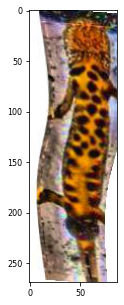

In [0]:
""" Example of augmented image """
img_path = '/content/databaseAug/Bascha_P01_T01_K04_M_Adult_4246_20190330215714.jpg'
img = plt.imread(img_path)
plt.imshow(img)

In [0]:
!zip -r /content/aug_database_for_seg.zip /content/databaseAug

In [0]:
!unzip -q /content/drive/"My Drive"/Stage/aug_database_for_seg.zip

replace content/databaseAug/Bascha_P01_T03_K15_M_Adult_1229_20190613064950.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


new augmentation with mask rcnn output

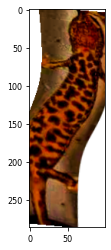

In [0]:

def preprocess_mask_rcnn(image_path, input_shape):
  """ apply all augmentation methods defined above on the image """
  #img = skimage.io.imread(image_path, plugin='matplotlib')
  #image = img_as_float64(io.imread(image_path))
  
  #plt.imshow(image)

  #print(np.max(image))
  #image = tf.keras.preprocessing.image.img_to_array(img)

  #image = image/255
  #print(np.max(image))

  image = img_as_float(io.imread(image_path))
  image = exposure.equalize_adapthist(image, clip_limit=0.03)
  image = random_saturation(image, show_result=False)
  image = random_brightness(image, show_result=False)
     
      
  image = image*255
      #plt.imshow(image)
      #plt.show()
      
  shear = uniform(-.1, .1)
      #print(shear)
  tfr = AffineTransform(shear=shear)
  sheared = transform.warp(image, tfr, order=1, preserve_range=True,mode='constant', cval=255)
      #sheared_fig = plot_side_by_side(img, sheared, 'Original', 'Sheared')
      #plt.title('shear')
      #plt.imshow(sheared)
      #v2_imshow(sheared)
      #sheared = tf.keras.preprocessing.image.img_to_array(sheared)
      #plt.imshow(sheared)
  
  strength = uniform(-1, 1)
      #print(strength)
  image = swirl(sheared, rotation=0, strength=strength, radius=500,mode='constant', cval=255)
      #print(image.shape)

  
  #print(np.max(image))
  #print(np.min(image))
  #plt.imshow(image)
  #plt.show()
  
  #img = plt.imread(image_path)
  #img = tf.convert_to_tensor(img)
  #plt.imshow(img)
  ### Add borders around the image to have more room for wraping and swirling
 # h,w=img.shape[0:2]
  #shift = 20
  #base_size=h+2*shift,w+2*shift,3
# make a 3 channel image for base which is slightly larger than target img
  #base=np.zeros(base_size)
  #cv2.rectangle(base,(0,0),(w+2*shift,h+2*shift),(255,255,255),40) # really thick white rectangle
  #base[shift:h+shift,shift:w+shift]=img # this works
  #img = base
  #print(img)
  #cv2_imshow(img)

  #h,w=img.shape[0:2]


  #print(np.max(image))
  #image = image/255
  #print(np.max(image))
### image swirling using sklearn swirl
# keep strength  between -1 and 1
# maximum radius = 500
# mode = constant because in case of "wrap" some parts of the newts go the other sides of the image. Bad for the training of the neural network
  
  #print(image)
  
  #plt.imshow(image)
  #plt.show()

  #white = np.array([1, 1, 1])
  #mask = np.abs(image - white).sum(axis=2) < 0.05
  
  # Find the bounding box of those pixels
  #coords = np.array(np.nonzero(~mask))
  #top_left = np.min(coords, axis=1)
  #print(top_left)
  #bottom_right = np.max(coords, axis=1)
  #print(bottom_right)

  #image = image[top_left[0]:bottom_right[0],
           #top_left[1]:bottom_right[1]]
  #print(np.max(image))
  #print(np.min(image))
  #plt.imshow(image)
  #plt.show()
  #print("Augmentation par couleurs")
  #swirled[swirled != 255]
  
  #newt = tf.image.random_brightness(newt, max_delta=0.10) # Random brightness
  #image = tf.image.random_flip_left_right(newt)
  #image = tf.image.random_flip_up_down(image)
  #image = tf.image.random_contrast(image,0.5,2)
  #image = tf.image.random_saturation(image,0.5,2)

  
    #print("height > width")
    #print("height > width")
  #plt.imshow(image/255)
  #print(image.shape)
  #plt.imshow(tf.keras.preprocessing.image.img_to_array(image))
  #print(type(image.))
  #print(image)
  

  #plt.imshow(out)
  #plt.show()
  #augPath = '/content/augDatabase/test.jpg'
  #image = image.astype(np.uint8)
  #skimage.io.imsave(augPath, image)

  return image

input_shape = (56,56,3)
img_path = '/content/database/Bascha_P01_T01_K03_F_Adult_4413_20190321004956.jpg'
img = preprocess_mask_rcnn(img_path, input_shape)
plt.imshow(img/255)


In [0]:


height = input_shape[0]
  width = input_shape[1]
  
  if (image.shape[0] < image.shape[1]):
    image = tf.image.resize(image, [width, height])
    #print("height < width")
    image = tf.image.transpose(image)
  else:
    image = tf.image.resize(image, [height, width])

In [0]:
input_shape = (56,56,3)


def augmentationImage(img_path,img_aug_path, input_shape):

  """ Create a proper dataset where each folder contains the images of one 
  specimen, randomly augmented 20 times for each "real" image present in the 
  original dataset """

  !rm -rf /content/databaseAug#useful when running the method again for makedirs
  data = pd.read_csv('/content/training.csv')
  #data = data.to_numpy()
  labels = data.iloc[:,4]
  #print(labels.head())
  names = data.iloc[:,0]
  #print(names.head())
  #abels.head()
  labels_uniques, counts = np.unique(labels, return_counts=True)
  
  #print(labels_uniques)
  for label in labels_uniques:
    os.makedirs(img_aug_path+'/train/'+label)
    os.makedirs(img_aug_path+'/test/'+label)


  print("Création de la base de données augmentées en cours...")
  # List all files in a directory using scandir()
  basepath = img_path
  with os.scandir(basepath) as images:
    for im in images:
      #print(im.name)
      if(im.name in names.values):
        
        id = names[names == im.name].index[0]
        #id = names.loc[im.name]
        #print(id)
        label = labels.iloc[id]
        #print('label : '+label)
        id_label = np.where(labels_uniques == label)
        #print(id_label)
        imagePath = basepath + '/' + im.name
        #print(imagePath)
        #print(imagePath)
        count = counts[id_label]
        #print(count)
        #img_path = '/content/database/Bascha_P01_T01_K14_M_Adult_1024_20190605213228.jpg'
        #img = prepare_img(input_shape,imagePath)
        #image = cv2_imread(path + '/' + im.name)
        
        
        k = 0
        while (k < 20):  ######### DIVISER PAR COUNT QUAND BASE DE DONNEE COMPLETE
          image = preprocess_mask_rcnn(imagePath, input_shape)
          #image = tf.image.random_brightness(image, max_delta=0.15) # Random brightness
          #image = tf.image.random_flip_left_right(image)
          #image = tf.image.random_flip_up_down(image)
          #image = tf.image.random_contrast(image,0.5,3)
          #image = tf.image.random_saturation(image,0.5,3)
          
         
          augPath = img_aug_path+'/train/'+label+'/' + im.name[:-4] + str(k) + '.jpg'
          #augPath = img_aug_path+'/test/'+label+'/' + im.name + str(k)
          #save_img(augPath, image)
          image = tf.keras.preprocessing.image.img_to_array(image)
          #image = image*255
          #cv2.imwrite(augPath,image)
          #print(image.shape)
          #plt.imshow(image/255)
          #plt.show()
          #skimage.io.imsave(augPath,image.astype('uint8'))
          plt.imsave(augPath, image/255)
          k += 1



In [0]:
img_path = '/content/database'
img_aug_path = '/content/databaseAug'
augmentationImage(img_path,img_aug_path,input_shape)

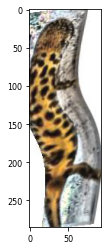

In [0]:
""" Here is an example of an augmented image of a newt from the dataset
generated by augmentationImage """

img_path = '/content/databaseAug/train/KM00049/Bascha_P01_T02_K05_F_Adult_4693_201903170400514.jpg'
img = plt.imread(img_path)
plt.imshow(img)

In [0]:
def apply_mask(image, mask):
    """Apply mask on image. Pixels outside of the mask are turned white.
    image: RGB image [height, width, 3]
    mask: instance segmentation mask [height, width, instance count]
    Returns result image.
    """
    # Make a grayscale copy of the image. The grayscale copy still
    # has 3 RGB channels, though.
    gray = skimage.color.gray2rgb(skimage.color.rgb2gray(image)) * 255
    # Copy color pixels from the original color image where mask is set
    if mask.shape[-1] > 0:
        # We're treating all instances as one, so collapse the mask into one layer
        mask = (np.sum(mask, -1, keepdims=True) >= 1)
        splash = np.where(mask, image, gray).astype(np.uint8)
    else:
        splash = gray.astype(np.uint8)
    return splash

In [0]:
def extract_crop(ds_types_path, ds_final_path, input_shape):
  """ take the proper dataset created by augmentationImage and extract the newts
  by segmenting and cropping """
   
  !rm -rf /content/ds_final

  for ds_type in os.listdir(ds_types_path):
    
    print(ds_type)
    ds_path = ds_types_path + '/' + ds_type
    final_path = ds_final_path + '/' + ds_type

    

    for class_name in os.listdir(ds_path):
      
      #print(class_name)
      dsPath = ds_path + '/' + class_name
      #print(dsPath)
      dsFinalPath = final_path + '/' + class_name

      for img_name in os.listdir(dsPath):

        #if os.path.isfile(img_name):
        
          print(img_name)
          imagePath = dsPath + '/' + img_name
          augPath = dsFinalPath + '/' + img_name
          if not (os.path.isdir(dsFinalPath)):
            os.makedirs(dsFinalPath)
          
          image = extract_image(imagePath)
          #plt.imshow(image)
          #plt.show()

          height = input_shape[0]
          width = input_shape[1]
          #print(np.max(image))
          #print(np.min(image))
  
          if (image.shape[0] < image.shape[1]):
            #image = tf.image.resize(image, [width, height])
            image = resize(image, (width, height),
                       anti_aliasing=False)
            #print("height < width")
            image = np.transpose(image,(1,0,2))
          else:
            #image = tf.image.resize(image, [height, width])
            image = resize(image, (height, width),
                       anti_aliasing=False)
        
          #image = tf.keras.preprocessing.image.img_to_array(image)
         
          #plt.imshow(image)
          #plt.show()
          plt.imsave(augPath, image)

In [0]:
input_shape = (75,30,3)
img_aug_path = '/content/databaseAug'
img_final_path = '/content/ds_final'
extract_crop(img_aug_path, img_final_path, input_shape)

Streaming output truncated to the last 5000 lines.
Bascha_P01_T03_K14_U_Juvenile_1058_201906052145190.jpg
Processing 1 images
image                    shape: (144, 102, 3)         min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32
Bascha_P01_T03_K14_U_Juvenile_1058_2019060521451917.jpg
Processing 1 images
image                    shape: (144, 102, 3)         min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32
Bascha_P01_T03_K14_U_Juvenile_1058

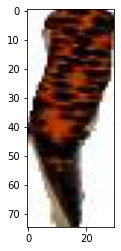

In [0]:
""" here is an example of a pattern extracted, read from the dataset generated
by extract_crop """

img_path = '/content/ds_final/train/KM00004/Bascha_P01_T03_K15_M_Adult_1228_2019061306250413.jpg'
img = plt.imread(img_path)
plt.imshow(img)

In [0]:
!zip -r /content/datasetFinal.zip /content/ds_final

Streaming output truncated to the last 5000 lines.
  adding: content/ds_final/test/KM00752/Bascha_P01_T04_K11_M_Adult_323_2019051803525319.jpg (deflated 9%)
  adding: content/ds_final/test/KM00752/Bascha_P01_T05_K14_M_Adult_886_201906091640359.jpg (deflated 9%)
  adding: content/ds_final/test/KM00752/Bascha_P01_T05_K14_M_Adult_886_201906091640350.jpg (deflated 10%)
  adding: content/ds_final/test/KM00752/Bascha_P01_T05_K14_M_Adult_886_201906091640352.jpg (deflated 9%)
  adding: content/ds_final/test/KM00752/Bascha_P01_T02_K13_M_Adult_806_201906021302580.jpg (deflated 9%)
  adding: content/ds_final/test/KM00609/ (stored 0%)
  adding: content/ds_final/test/KM00609/Bascha_P01_T04_K11_F_Adult_259_201905152155227.jpg (deflated 9%)
  adding: content/ds_final/test/KM00609/Bascha_P01_T01_K05_F_Adult_4589_201904031045006.jpg (deflated 9%)
  adding: content/ds_final/test/KM00609/Bascha_P01_T06_K05_F_Adult_5084_2019031605072314.jpg (deflated 9%)
  adding: content/ds_final/test/KM00609/Bascha_P01_

In [0]:


img_path = '/content/img2.png'
img = Image.open(img_path)


  #image = tf.keras.preprocessing.image.img_to_array(img)

  
#plt.imsave(augPath, image)

In [0]:
augPath = '/content/augDatabase/test'
skimage.io.imsave(augPath, img)

# Old augmentation with color segmentation, canny contours, and rectangle extraction. (do not run)
Issue : segmentation quality not consistant because of a big variability of lightness, saturation and contrast

In [0]:
def auto_canny(image, sigma=0.33):
    # compute the median of the single channel pixel intensities
    v = np.median(image)

    # apply automatic Canny edge detection using the computed median
    lower = int(max(0, (1.0 - sigma) * v))
    upper = int(min(255, (1.0 + sigma) * v))
    edged = cv2.Canny(image, lower, upper)

    # return the edged image
    return edged

In [0]:
from random import random, uniform

# load Image
img_path = '/content/database/Bascha_P01_T05_K20_U_Larva_8359_20190717223645.jpg'
#img_path = '/content/database/Bascha_P01_T01_K14_M_Adult_1039_20190607040030.jpg'
#img_path = '/content/database/Bascha_P01_T06_K13_M_Adult_1008_20190601154259.jpg'
img_path = '/content/database/Bascha_P01_T05_K18_M_Adult_6164_20190703234211.jpg'
img_path = '/content/database/Bascha_P01_T01_K14_M_Adult_1024_20190605213228.jpg'
img_path = '/content/database/Bascha_P01_T02_K13_M_Adult_750_20190531073133.jpg'

def preprocess_newts(img_path, input_shape):
  #img = imread(img_path)
  img = cv2.imread(img_path)
# plot original Image
#plt.imshow(img)
#plt.show()
#cv2_imshow(img)


  h,w=img.shape[0:2]

### Add borders around the image to have more room for wraping and swirling
  shift = 20
  base_size=h+2*shift,w+2*shift,3
# make a 3 channel image for base which is slightly larger than target img
  base=np.zeros(base_size)
  cv2.rectangle(base,(0,0),(w+2*shift,h+2*shift),(255,255,255),40) # really thick white rectangle
  base[shift:h+shift,shift:w+shift]=img # this works
  img = base
#print(img)
#cv2_imshow(img)

  h,w=img.shape[0:2]

  #print("Augmentation par déformation")

### image shearing using sklearn.transform.AffineTransform
# try out with differnt values of shear 

  shear = uniform(-.3, .3)
  #print(shear)
  tfr = AffineTransform(shear=shear)
  sheared = transform.warp(img, tfr, order=1, preserve_range=True,mode='constant', cval=255)
#sheared_fig = plot_side_by_side(img, sheared, 'Original', 'Sheared')
#plt.title('shear')
#plt.imshow(sheared)
#v2_imshow(sheared)

### image swirling using sklearn swirl
# keep strength  between -1 and 1
# maximum radius = 500
# mode = constant because in case of "wrap" some parts of the newts go the other sides of the image. Bad for the training of the neural network
  strength = uniform(-1, 1)
#print(strength)
  swirled = swirl(sheared, rotation=0, strength=strength, radius=500,mode='constant', cval=255)
#plt.imshow(swirled)
#cv2_imshow(swirled)

  img = swirled
  #print(img.shape)
  img = img.astype(np.uint8)

  img0 = cv2.equalizeHist(img[:,:,0])
  img1 = cv2.equalizeHist(img[:,:,1])
  img2 = cv2.equalizeHist(img[:,:,2])
  img[:,:,0] = img0
  img[:,:,1] = img1
  img[:,:,2] = img2


#cv2_imshow(img)

  h,w=img.shape[0:2]



  hls = cv2.cvtColor(img, cv2.COLOR_BGR2HLS) 
  lower_yellow = np.array([5,15,25]) 
  upper_yellow = np.array([100,240,255]) 

  lower_yellow2 = np.array([160,15,25]) 
  upper_yellow2 = np.array([180,240,255]) 
#hsl(63, 20%, 81%)
  lower_black = np.array([0,0,50]) 
  upper_black = np.array([35,75,255]) 

  lower_black2 = np.array([155,0,50]) 
  upper_black2 = np.array([180,75,255]) 
# Here we are defining range of yellow color in HSL 
# This creates a mask of yellow coloured  
# objects found in the frame. 
  mask = cv2.inRange(hls, lower_yellow, upper_yellow)
  mask2 = cv2.inRange(hls, lower_yellow2, upper_yellow2)
  mask_b = cv2.inRange(hls, lower_black, upper_black) 
  mask_b2 = cv2.inRange(hls, lower_black2, upper_black2)

  mask = mask_b2+mask_b+mask+mask2
# The bitwise and of the frame and mask is done so  
# that only the blue coloured objects are highlighted  
# and stored in res 
#res = cv2.bitwise_or()
  res = cv2.bitwise_and(img,img, mask= mask) 
#cv2_imshow(img) 
#cv2_imshow(mask)
#cv2_imshow(res) 


  mask_blur = cv2.GaussianBlur(mask,(5,5),cv2.BORDER_DEFAULT)

  threshMap = cv2.threshold(mask_blur.astype("uint8"), 0, 255,
	  cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]

  kernel = np.ones((7,7),np.uint8)
  threshMap = cv2.dilate(threshMap, kernel)
  threshMap = cv2.erode(threshMap, kernel)


#cv2_imshow(mask_blur)
#cv2_imshow(threshMap)

  canny_output = auto_canny(threshMap, sigma = 0.3)
#canny_output = cv2.convertScaleAbs(canny_output)
  kernel = np.ones((9,9),np.uint8)
  threshed = cv2.dilate(canny_output,kernel)


#print(canny_output[1])
#plt.imshow(canny_output)
#plt.colorbar()
#plt.show()


## findContours(查找轮廓)
  cnts = cv2.findContours(threshed, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)[-2]

#print(cnts[0])
#plt.imshow(threshed)
#plt.colorbar()
#plt.show()
#print(cnts.shape)

#new,contours, hierarchy = cv2.findContours(threshed, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
#contours= sorted(contours, key = cv2.contourArea, reverse = True)[:4]
#c=contours[0]
#print(cv2.contourArea(c))
#final = cv2.drawContours(img, [c], -1, (255,0, 0), 3)


#cnts = canny_output
#cnts = sorted(canny_output, key=cv2.contourArea)
## sorted by area(按照面积排序)
  cnts = sorted(cnts, key=cv2.contourArea)

## get the maximum's boundinRect(获取最大边缘的外接矩形)
  cnt = cnts[-1]

## create mask(创建掩模)
  mask = np.ones_like(threshMap, np.uint8)*cv2.GC_PR_BGD
  cv2.drawContours(mask, cnt, -1, cv2.GC_FGD, -1)

#print("shape of cnt: {}".format(cnt.shape))

#plt.imshow(mask)
#plt.colorbar()
#plt.show()

#new_image = cv2.bitwise_and(img,img,mask=mask)
#print(mask)
  new_image = threshMap.copy()
  new_image[mask == 2] = 0  # Set values not masked to be 0

#plt.imshow(new_image)
#plt.colorbar()
#plt.show()

#retval = cv2.contourArea(cnt)
#print(retval)

  rect = cv2.minAreaRect(cnt)
  #print("rect: {}".format(rect))

  box = cv2.boxPoints(rect)
  box = np.int0(box)

  width = int(rect[1][0])
  height = int(rect[1][1])

  src_pts = box.astype("float32")
  dst_pts = np.array([[0, height-1],
                    [0, 0],
                    [width-1, 0],
                    [width-1, height-1]], dtype="float32")
  M = cv2.getPerspectiveTransform(src_pts, dst_pts)
  warped = cv2.warpPerspective(img, M, (width, height))

#cv2_imshow(warped)

  #print("Augmentation par couleurs")
  image = tf.image.random_brightness(warped, max_delta=0.10) # Random brightness
  #image = tf.image.random_flip_left_right(image)
  #image = tf.image.random_flip_up_down(image)
  image = tf.image.random_contrast(image,0.5,2)
  image = tf.image.random_saturation(image,0.5,2)

  height = input_shape[0]
  width = input_shape[1]
  
  if (image.shape[0] < image.shape[1]):
    image = tf.image.resize(image, [width, height])
    #print("height < width")
    image = tf.image.transpose(image)
  else:
    image = tf.image.resize(image, [height, width])
    #print("height > width")

  return image

#from keras.preprocessing.image import array_to_img, img_to_array
#img = img_to_array(image)
#cv2_imshow(img.astype('uint8'))



In [0]:
input_shape = (56,56,3)


def augmentationImage(img_path,img_aug_path, input_shape):

  
  !rm -rf /content/content/databaseAug
  data = pd.read_csv('/content/content/Stage/training.csv',)
  #data = data.to_numpy()
  labels = data.iloc[:,4]
  #print(labels.head())
  names = data.iloc[:,0]
  #print(names.head())
  #abels.head()
  labels_uniques, counts = np.unique(labels, return_counts=True)
  
  #print(labels_uniques)
  for label in labels_uniques:
    os.makedirs(img_aug_path+'/train/'+label)
    os.makedirs(img_aug_path+'/test/'+label)


  print("Création de la base de données augmentées en cours...")
  # List all files in a directory using scandir()
  basepath = '/content/content/Stage/database'
  with os.scandir(basepath) as images:
    for im in images:
      #print(im.name)
      if(im.name in names.values):
        
        id = names[names == im.name].index[0]
        #id = names.loc[im.name]
        #print(id)
        label = labels.iloc[id]
        #print('label : '+label)
        id_label = np.where(labels_uniques == label)
        #print(id_label)
        imagePath = basepath + '/' + im.name
        #print(imagePath)
        
        count = counts[id_label]
        #print(count)
        #img_path = '/content/database/Bascha_P01_T01_K14_M_Adult_1024_20190605213228.jpg'
        #img = prepare_img(input_shape,imagePath)
        #image = cv2_imread(path + '/' + im.name)
        
        
        k = 0
        while (k < 20):  ######### DIVISER PAR COUNT QUAND BASE DE DONNEE COMPLETE
          #image = tf.image.random_brightness(img, max_delta=0.15) # Random brightness
          #image = tf.image.random_flip_left_right(image)
          #image = tf.image.random_flip_up_down(image)
          #image = tf.image.random_contrast(image,0.5,3)
          #image = tf.image.random_saturation(image,0.5,3)
          image = preprocess_newts(imagePath, input_shape)
         
          augPath = img_aug_path+'/train/'+label+'/' + im.name[:-4] + str(k) + '.jpg'
          #augPath = img_aug_path+'/test/'+label+'/' + im.name + str(k)
          #save_img(augPath, image)
          image = tf.keras.preprocessing.image.img_to_array(image)
          #print(image.shape)
          cv2.imwrite(augPath,image*255)
          #plt.imsave(augPath, image/255)
          k += 1



In [0]:
img_path = '/content/seg_database'
img_aug_path = '/content/databaseAug'
augmentationImage(img_path,img_aug_path,input_shape)

In [0]:
""" Train/Test split """

train_path = '/content/databaseAug/train'
test_path = '/content/databaseAug/test'
dest1 =  pathlib.Path(test_path)
source1 = pathlib.Path(train_path)

for label in os.listdir(train_path):
  if len(os.listdir(train_path + '/' + label)) == 0: # Check if empty..
    shutil.rmtree(train_path + '/' + label) # Delete..

import fnmatch



for class_name in os.listdir(train_path):
      

      class_path = os.path.join(source1, class_name)
      class_path_test = os.path.join(dest1, class_name)
      #os.mkdir(class_path_test)
      #label_map_dict[class_name]=count_label
      imgs = fnmatch.filter(os.listdir(class_path), '*.jpg')
      nbr_img = len(imgs)

      idx = np.arange(nbr_img)
      idx_test = np.random.choice(idx, size=10, replace=False)
      print(len(os.listdir(class_path)))

      #Copie de certains éléments dans le test set
      for i in range (len(os.listdir(class_path))):
        if i in idx_test:
          print(str(class_path) + '/'+ str(os.listdir(class_path)[i]))
          shutil.copy(str(class_path) + '/'+ str(os.listdir(class_path)[i]), str(class_path_test) + '/'+ str(os.listdir(class_path)[i]))
      #Suppression des éléments copiés dans le train set
      files = os.listdir(class_path)
      for i in range (len(files)):
        if i in idx_test:
          print(str(class_path) + '/'+ str(files[i]))
          file_path = pathlib.Path(str(class_path) + '/'+ str(files[i]))
          os.remove(file_path)
          #print("removed")


for label in os.listdir(test_path):
  if len(os.listdir(test_path + '/' + label)) == 0: # Check if empty..
    shutil.rmtree(test_path + '/' + label) # Delete..

In [0]:
img = plt.imread('/content/databaseAug/train/KM00002/Bascha_P01_T02_K13_M_Adult_756_201905311224524.jpg')
plt.imshow(img)

In [0]:
!zip -r /content/databaseAug.zip /content/databaseAug

In [0]:
!unzip -q '/content/drive/My Drive/Stage/databaseAug.zip'

# Import the augmented, cropped dataset to begin the training with the triplet loss embedding

In [0]:
train_size = sum(len(files) for _, _, files in os.walk(r'/content/databaseAug/train'))
print(train_size)
test_size = sum(len(files) for _, _, files in os.walk(r'/content/databaseAug/test'))
print(test_size)

In [0]:


#width = 56
#height = 56

train_path = '/content/ds_final/train'
test_path = '/content/ds_final/test'

def get_label(file_path):
  # convert the path to a list of path components
  parts = tf.strings.split(file_path, os.path.sep)
  print(parts[-2])
  # The second to last is the class-directory
  return parts[-2] == CLASS_NAMES

def decode_img(img):
  # convert the compressed string to a 3D uint8 tensor
  img = tf.image.decode_jpeg(img, channels=3)
  # Use `convert_image_dtype` to convert to floats in the [0,1] range.
  #img = tf.image.convert_image_dtype(img, tf.float32)
  # resize the image to the desired size.
  return img

def process_path(file_path):
  #print(file_path)
  label = get_label(file_path)
  # load the raw data from the file as a string
  img = tf.io.read_file(file_path)
  try:
    img = decode_img(img)
    #print(np.max(img))
    print("decoded")
    counter +=1
  except:
    print("erreur décodage")

  return img, label

def format_image(image, label):
  image = tf.cast(image, tf.float32)
  image = (image/127.5) - 1
  image = tf.image.resize(image, (input_shape[0], input_shape[1]))
  return image, label

In [0]:
train_path = '/content/ds_final/train'
test_path = '/content/ds_final/test'

train_size = sum(len(files) for _, _, files in os.walk(train_path))
print(train_size)
test_size = sum(len(files) for _, _, files in os.walk(test_path))
print(test_size)

#BATCH_SIZE = 32
#input_shape = (50,35,3)
#data_dir = "/content/male"
input_shape = (75,32,3)



data_dir = pathlib.Path(train_path)
test_dir = pathlib.Path(test_path)

list_ds = tf.data.Dataset.list_files(str(data_dir)+'/*/*')
list_ds_test = tf.data.Dataset.list_files(str(test_dir)+'/*/*')

CLASS_NAMES = np.array([item.name for item in data_dir.glob('*') if item.name != "LICENSE.txt"])
#print(type(CLASS_NAMES))
print(CLASS_NAMES)
#for f in list_ds.take(5):
  #print(f.numpy())
#counter = 0

def show_batch(image_batch, label_batch):
  plt.figure(figsize=(10,10))
  for n in range(25):
      ax = plt.subplot(5,5,n+1)
      plt.imshow(image_batch[n])
      plt.title(CLASS_NAMES[label_batch[n]==1][0].title())
      plt.axis('off')

def augment(image,label):
  #image,label = convert(image, label)
  image = tf.image.convert_image_dtype(image, tf.float32) # Cast and normalize the image to [0,1]
  #image = tf.image.rgb_to_grayscale(image)
  #image = tf.image.resize_with_crop_or_pad(image, 34, 34) # Add 6 pixels of padding
  #image = tf.image.random_crop(image, size=[28, 28, 1]) # Random crop back to 28x28
  #image = tf.image.random_brightness(image, max_delta=0.5) # Random brightness
  #image = tf.image.flip_left_right(image)

  return image,label
#Use Dataset.map to create a dataset of image, label pairs:

# Set `num_parallel_calls` so multiple images are loaded/processed in parallel.
labeled_ds = list_ds.map(process_path, num_parallel_calls=AUTOTUNE)
labeled_ds_test = list_ds_test.map(process_path, num_parallel_calls=AUTOTUNE)

#train_size = int(0.7 * nbr_element)

#val_size = int(0.30 * nbr_element)
#test_size = int(0.15 * DATASET_SIZE)


#full_dataset = labeled_ds.shuffle()
#train_dataset = labeled_ds.take(train_size)
#test_dataset = labeled_ds.skip(train_size)
#val_dataset = test_dataset.skip(test_size)
#test_dataset = test_dataset.take(val_size)

train_dataset = labeled_ds.map(format_image, num_parallel_calls=AUTOTUNE)
test_dataset = labeled_ds_test.map(format_image, num_parallel_calls=AUTOTUNE)

count_label = len(os.listdir(train_path))
#print(count_label)

x_train = np.zeros((train_size,input_shape[0],input_shape[1],input_shape[2]))
y_train = np.zeros((train_size))
x_test = np.zeros((test_size,input_shape[0],input_shape[1],input_shape[2]))
y_test = np.zeros((test_size))

k=0
for image, label in train_dataset:
  #print(label)
  x_train[k,:,:,:] = image
  y_train[k] = np.where(label)[0][0]
  k += 1
k=0
for image, label in test_dataset:
  x_test[k,:,:,:] = image
  y_test[k] = np.where(label)[0][0]
  k += 1
  #print(np.where(label)[0])

#tfds_train = tf.data.Dataset.from_tensor_slices((x_train, y_train))
#tfds_train = tfds_train.batch(32)
#for i,j in tfds_train:
 # print(i)
  #print(j)
#tfds_test = tf.data.Dataset.from_tensor_slices((x_test, y_test))
#tfds_test = tfds_test.batch(32)
  #print("Image shape: ", image.numpy().shape)
  #print("Label: ", label.numpy())
#print(y_train)
dataset = []
dataset_test = []
    
#Sorting images by classes and normalize values 0=>
for n in range(count_label):
    images_class_n_train = np.asarray([row for idx,row in enumerate(x_train) if y_train[idx]==n])
    dataset.append(images_class_n_train)


    images_class_n_test = np.asarray([row for idx,row in enumerate(x_test) if y_test[idx]==n])
    dataset_test.append(images_class_n_test)

  
print("nombre de classes différentes : "+ str(count_label))
#for n in range(int(count_label*0.30)):
 #   images_class_n = np.asarray([row for idx,row in enumerate(x_test) if y_test[idx]==n])
    #print(images_class_n.shape)
  #  dataset_test.append(images_class_n/255)
        
    #images_class_n = np.asarray([row for idx,row in enumerate(x_test_origin) if y_test_origin[idx]==n])
    #dataset_test.append(images_class_n/255)
#input_shape = [width,height,3]




16870
5570
['KM00579' 'KM00176' 'KM00993' 'KM00230' 'KM00721' 'KM00695' 'KM00425'
 'KM00703' 'KM00890' 'KM00957' 'KM00540' 'KM00927' 'KM00105' 'KM00992'
 'KM00186' 'KM00571' 'KM00893' 'KM00973' 'KM00002' 'KM00934' 'KM00014'
 'KM00536' 'KM00850' 'KM00401' 'KM00869' 'KM00557' 'KM00863' 'KM00621'
 'KM00095' 'KM00498' 'KM00336' 'KM00683' 'KM00752' 'KM00609' 'KM00222'
 'KM00101' 'KM00361' 'KM00012' 'KM00106' 'KM00816' 'KM00937' 'KM00402'
 'KM00926' 'KM00733' 'KM00787' 'KM00896' 'KM00881' 'KM00954' 'KM00915'
 'KM00099' 'KM00979' 'KM00132' 'KM00093' 'KM00898' 'KM00587' 'KM00725'
 'KM00676' 'KM00749' 'KM00241' 'KM00991' 'KM00510' 'KM00035' 'KM00270'
 'KM00072' 'KM00627' 'KM00758' 'KM00470' 'KM00152' 'KM00407' 'KM00244'
 'KM00798' 'KM00473' 'KM00116' 'KM00315' 'KM00178' 'KM00440' 'KM00568'
 'KM00906' 'KM00560' 'KM00804' 'KM00975' 'KM00544' 'KM00309' 'KM00849'
 'KM00308' 'KM00158' 'KM00314' 'KM00534' 'KM00343' 'KM00485' 'KM00941'
 'KM00089' 'KM00885' 'KM00460' 'KM00868' 'KM00034' 'KM00705' 'KM00

In [0]:
np.max(dataset[0])

1.0

In [0]:
!zip -r /content/augmentedNewts56.zip /content/content/databaseAug
#from google.colab import files
#files.download("/content/Stage_Dataset.zip")

# Only to compare the performances, import the AmphIdent outputs instead.



In [0]:
width = 32
height = 75


def get_label(file_path):
  # convert the path to a list of path components
  #parts = str(file_path).split("/")
  parts = tf.strings.split(file_path, os.path.sep)
  #print(type(parts[-1]))
  print(parts[-1].numpy().decode("utf-8"))
  #test = str(parts)
  
  #for part in parts:
   # print(part)
  #lab = parts[-2].numpy().decode("utf-8")  + '/'+ parts[-1].numpy().decode("utf-8")
  #lab = parts[-1]
  #print(lab)
  #print(parts.  )

  #for l in np.range(lab):
    #print(l)

  i = 0
  while (parts[-1].numpy().decode("utf-8")[i] != "_"):
    i += 1
  
  #id = patterns[patterns == lab]
  #if (id.empty):
  #print(lab)

  
  # The second to last is the class-directory
  #print( tf.convert_to_tensor(lab[:i]))
  #print(CLASS_NAMES)
  #print(type(tf.convert_to_tensor(parts[-1].numpy().decode("utf-8")[:i])))
  #print(CLASS_NAMES[0])
  #print(type(CLASS_NAMES[0]))
  return tf.convert_to_tensor(parts[-1].numpy().decode("utf-8")[:i]) == CLASS_NAMES
  #assert not id.empty 
  #print(id.index)

 # id = ids.iloc[id.index]
  #print(id)
  # The second to last is the class-directory
  #print(type(tf.convert_to_tensor(id)))
  #return tf.convert_to_tensor(id)[0]
def decode_img(img):
  # convert the compressed string to a 3D uint8 tensor
  img = tf.image.decode_jpeg(img, channels=3)
  # Use `convert_image_dtype` to convert to floats in the [0,1] range.
  img = tf.image.convert_image_dtype(img, tf.float32)
  # resize the image to the desired size.
  return tf.image.resize(img, [width, height])

def process_path(file_path):
  #print(file_path)
  label = get_label(file_path)
  # load the raw data from the file as a string
  img = tf.io.read_file(file_path)
  #print(img)
  try:
    img = decode_img(img)
    #print("decoded")
    counter +=1
  except:
   # print("erreur décodage")
    pass

  return img, label

In [0]:
train_size = sum(len(files) for _, _, files in os.walk(r'/content/train'))
print(train_size)
test_size = sum(len(files) for _, _, files in os.walk(r'/content/test'))
print(test_size)

In [0]:
#BATCH_SIZE = 32

#data_dir = "/content/male"

#base_path = "/content/Stage/database"


#nathan_ds = tf.data.Dataset.list_files(str(nathan_dir)+'/*')

#CLASS_NAMES = np.array([item.name for item in data_dir.glob('*') if item.name != "LICENSE.txt"])

#for f in list_ds.take(5):
  #print(f.numpy())
#counter = 0


ds_path = "/content/content/Stage/database/dataset_regroupe"
ds_path = pathlib.Path(ds_path)

ds_dir = os.listdir(ds_path)

CLASS_NAMES = []

for pattern in ds_dir:
  i = 0
  while (pattern[i] != "_"):
    i += 1
  CLASS_NAMES.append(pattern[:i])
  #print(pattern[:i])

CLASS_NAMES = np.array(CLASS_NAMES)
CLASS_NAMES = np.unique(CLASS_NAMES)

def show_batch(image_batch, label_batch):
  plt.figure(figsize=(10,10))
  for n in range(25):
      ax = plt.subplot(5,5,n+1)
      plt.imshow(image_batch[n])
      plt.title(CLASS_NAMES[label_batch[n]==1][0].title())
      plt.axis('off')

def augment(image,label):
  #image,label = convert(image, label)
  image = tf.image.convert_image_dtype(image, tf.float32) # Cast and normalize the image to [0,1]
  #image = tf.image.resize_with_crop_or_pad(image, 34, 34) # Add 6 pixels of padding
  #image = tf.image.random_crop(image, size=[28, 28, 1]) # Random crop back to 28x28
  image = tf.image.random_brightness(image, max_delta=0.5) # Random brightness
  image = tf.image.flip_left_right(image)

  return image,label
#Use Dataset.map to create a dataset of image, label pairs:
#nathands = tf.data.Dataset.list_files(str(nathan_ds)+'/*')
# Set `num_parallel_calls` so multiple images are loaded/processed in parallel.
#labeled_ds = ds.map(lambda x: tf.py_function(process_path, [x], [tf.float32, tf.bool]), num_parallel_calls = AUTOTUNE)
#print(labeled_ds_nathan)
#for image,label in labeled_ds:
  #print(image)
  #print(label)
#labeled_ds_remy = remy_ds.map(process_path, num_parallel_calls=AUTOTUNE)
#train_size = int(0.7 * nbr_element)
#train_size=nbr_element-count_label*4
#test_size=count_label*4
#val_size = int(0.30 * nbr_element)
#test_size = int(0.15 * DATASET_SIZE)
#print(patterns)
train_size = patterns.size

#full_dataset = labeled_ds.shuffle()
#train_dataset = labeled_ds_nathan.take(len(nathan_ds))
#train_dataset2 = labeled_ds_remy.take(len(remy_ds))
#test_dataset = labeled_ds.skip(train_size)
#val_dataset = test_dataset.skip(test_size)
#test_dataset = test_dataset.take(val_size)
train_dataset = ds.map(lambda x: tf.py_function(process_path, [x], [tf.float32, tf.bool]), num_parallel_calls = AUTOTUNE)
#train_dataset2 = labeled_ds_remy.map(augment, num_parallel_calls=AUTOTUNE)
test_dataset = ds.map(lambda x: tf.py_function(process_path, [x], [tf.float32, tf.bool]), num_parallel_calls = AUTOTUNE)

x_train = np.zeros((train_size,width,height,3))
y_train = np.zeros((train_size,1))
x_test = np.zeros((test_size,width,height,3))
y_test = np.zeros((test_size))

k=0
for image,label in train_dataset:
  #print(label)
  x_train[k,:,:,:] = image
  y_train[k] = np.where(label)[0][0]
  k += 1

k=0
for image, label in test_dataset:
 x_test[k,:,:,:] = image
 y_test[k] = np.where(label)[0][0]
 k += 1
 print(np.where(label)[0])


print(y_train)
dataset = []
dataset_test = []
    
#Sorting images by classes and normalize values 0=>
for n in range(len(labels)):
    images_class_n_train = np.asarray([row for idx,row in enumerate(x_train) if y_train[idx]==n])
    dataset.append(images_class_n_train/255)

    images_class_n_test = np.asarray([row for idx,row in enumerate(x_test) if y_test[idx]==n])
    dataset_test.append(images_class_n_test/255)

  
print("nombre de classes différentes : "+ str(count_label))
  
input_shape = [width,height,3]




[[481.]
 [715.]
 [380.]
 ...
 [226.]
 [476.]
 [451.]]


MNIST dataset that was used at the very beginning of the project, do not run

In [0]:
""" build MNIST dataset """

nb_classes = 10
count_label = nb_classes
img_rows, img_cols = 28, 28
input_shape = [img_rows, img_cols, 1]

def buildDataSet():
    """Build dataset for train and test
    
    
    returns:
        dataset : list of lengh 10 containing images for each classes of shape (?,28,28,1)
    """

    #fashion_mnist = tf.keras.datasets.fashion_mnist

    #(x_train_origin, y_train_origin), (x_test_origin, y_test_origin) = fashion_mnist.load_data()
    (x_train_origin, y_train_origin), (x_test_origin, y_test_origin) = datasets.mnist.load_data()

    assert backend.image_data_format() == 'channels_last'
    x_train_origin = x_train_origin.reshape(x_train_origin.shape[0], img_rows, img_cols, 1)
    x_test_origin = x_test_origin.reshape(x_test_origin.shape[0], img_rows, img_cols, 1)
    
    dataset_train = []
    dataset_test = []
    
    #Sorting images by classes and normalize values 0=>1
    for n in range(nb_classes):
        images_class_n = np.asarray([row for idx,row in enumerate(x_train_origin) if y_train_origin[idx]==n])
        #print(images_class_n.shape)
        dataset_train.append(images_class_n/255)
        
        images_class_n = np.asarray([row for idx,row in enumerate(x_test_origin) if y_test_origin[idx]==n])
        dataset_test.append(images_class_n/255)
    
    return dataset_train,dataset_test,x_train_origin,y_train_origin,x_test_origin,y_test_origin

dataset,dataset_test,x_train_origin,y_train_origin,x_test_origin,y_test_origin = buildDataSet()

11493376/11490434 [==============================] - 0s 0us/step


# Triplet Loss Embedding implementation

![fig2](https://user-images.githubusercontent.com/18154355/61485417-1cbb1f00-a96f-11e9-8d6a-94964ce8c4db.png)

# Build different architectures of neural networks

In [0]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Lambda, BatchNormalization
from tensorflow.keras.regularizers import l2
from tensorflow.keras.backend import l2_normalize
from tensorflow.keras import Input, Model

def build_network_feedforward(input_shape, embeddingsize):
    '''
    Define the neural network to learn image similarity
    Input : 
            input_shape : shape of input images
            embeddingsize : vectorsize used to encode our picture   
    '''
     # Convolutional Neural Network
    network = Sequential()
    network.add(Flatten(input_shape=input_shape))
    #network.add(Dense(4096, activation='relu',
     #              kernel_regularizer=l2(1e-3),
      #             kernel_initializer='he_uniform'))
    
    
    network.add(Dense(embeddingsize, activation=None,
                   kernel_regularizer=l2(1e-3),
                   kernel_initializer='he_uniform'))
    
    #Force the encoding to live on the d-dimentional hypershpere
    #network.add(Lambda(lambda x: K.l2_normalize(x,axis=-1)))
    
    return network



In [0]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Lambda, BatchNormalization, Dropout
from tensorflow.keras.regularizers import l2
from tensorflow.keras.backend import l2_normalize
from tensorflow.keras import Input, Model

def build_network(input_shape, embeddingsize):
    '''
    Define the neural network to learn image similarity
    Input : 
            input_shape : shape of input images
            embeddingsize : vectorsize used to encode our picture   
    '''
     # Convolutional Neural Network
    network = Sequential()
    network.add(Conv2D(500, (9,9), activation='relu',
                     input_shape=input_shape,
                     kernel_initializer='he_uniform',
                     ))
    network.add(MaxPooling2D())
    network.add(Dropout(0.5))
    network.add(BatchNormalization())
    network.add(Flatten())
    #network.add(Dense(4096, activation='relu',
     #              kernel_regularizer=l2(1e-3),
      #             kernel_initializer='he_uniform'))
    
    
    network.add(Dense(embeddingsize, activation=None,
                   kernel_regularizer=l2(1e-3),
                   kernel_initializer='he_uniform'))
    
    #Force the encoding to live on the d-dimentional hypershpere
    network.add(Lambda(lambda x: l2_normalize(x,axis=-1)))
    
    return network



In [0]:
def build_network(input_shape, embeddingsize):
    '''
    Define the neural network to learn image similarity
    Input : 
            input_shape : shape of input images
            embeddingsize : vectorsize used to encode our picture   
    '''
     # Convolutional Neural Network
    network = Sequential()
    network.add(Conv2D(128, (7,7), activation='relu',
                     input_shape=input_shape,
                     kernel_initializer='he_uniform',
                     kernel_regularizer=l2(2e-4)))
    network.add(MaxPooling2D())
    network.add(Conv2D(128, (3,3), activation='relu', kernel_initializer='he_uniform',
                     kernel_regularizer=l2(2e-4)))
    network.add(MaxPooling2D())
    network.add(Conv2D(256, (3,3), activation='relu', kernel_initializer='he_uniform',
                     kernel_regularizer=l2(2e-4)))
    network.add(Flatten())
    network.add(Dense(4096, activation='relu',
                   kernel_regularizer=l2(1e-3),
                   kernel_initializer='he_uniform'))
    
    
    network.add(Dense(embeddingsize, activation=None,
                   kernel_regularizer=l2(1e-3),
                   kernel_initializer='he_uniform'))
    
    #Force the encoding to live on the d-dimentional hypershpere
    network.add(Lambda(lambda x: l2_normalize(x,axis=-1)))
    
    return network

This neural network is the best, do not run the others

In [0]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Lambda, BatchNormalization, Dropout
from tensorflow.keras.regularizers import l2
from tensorflow.keras.backend import l2_normalize
from tensorflow.keras import Input, Model

def build_network(input_shape, embeddingsize):
    '''
    Define the neural network to learn image similarity
    Input : 
            input_shape : shape of input images
            embeddingsize : vectorsize used to encode our picture   
    '''
     # Convolutional Neural Network
    network = Sequential()
    network.add(Conv2D(512, (7,7), activation='relu',
                     input_shape=input_shape,
                     kernel_initializer='he_uniform',
                     ))
    network.add(MaxPooling2D())
    network.add(Dropout(0.3))
    network.add(BatchNormalization())
    network.add(Conv2D(512, (5,5), activation='relu', kernel_initializer='he_uniform',
                     ))
    network.add(MaxPooling2D())
    network.add(Dropout(0.3))
    network.add(BatchNormalization())
    network.add(Conv2D(512, (3,3), activation='relu', kernel_initializer='he_uniform',
                     ))
    network.add(MaxPooling2D())
    #network.add(Dropout(0.5))
    
    network.add(Flatten())
    #network.add(Dense(4096, activation='relu',
     #              kernel_regularizer=l2(1e-3),
      #             kernel_initializer='he_uniform'))
    network.add(BatchNormalization())
    
    network.add(Dense(embeddingsize, activation=None,
                   kernel_initializer='he_uniform'))
    
    #Force the encoding to live on the d-dimentional hypershpere
    #network.add(Lambda(lambda x: l2_normalize(x,axis=-1)))
    
    return network



In [0]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Lambda, BatchNormalization, Dropout
from tensorflow.keras.regularizers import l2
from tensorflow.keras.backend import l2_normalize
from tensorflow.keras import Input, Model

def build_network(input_shape, embeddingsize):
    '''
    Define the neural network to learn image similarity
    Input : 
            input_shape : shape of input images
            embeddingsize : vectorsize used to encode our picture   
    '''
     # Convolutional Neural Network
    network = Sequential()
    network.add(Conv2D(128, (5,5),
                     input_shape=input_shape,
                     kernel_initializer='he_uniform'))
    network.add(tf.keras.layers.LeakyReLU(alpha=0.3))
                     ##kernel_regularizer=l2(2e-4)))
    network.add(MaxPooling2D())
    network.add(Dropout(0.5))
    
    network.add(Flatten())
    network.add(Dense(2048,
                   kernel_regularizer=l2(1e-5),
                   kernel_initializer='glorot_uniform'))
    network.add(BatchNormalization())
    network.add(tf.keras.layers.LeakyReLU(alpha=0.3))
    network.add(Dense(512,
                   kernel_regularizer=l2(1e-5),
                   kernel_initializer='glorot_uniform'))
    network.add(BatchNormalization())
    network.add(tf.keras.layers.LeakyReLU(alpha=0.3))
    network.add(Dense(embeddingsize, activation=None,
                   kernel_regularizer=l2(1e-5),
                   kernel_initializer='glorot_uniform'))
    
    #Force the encoding to live on the d-dimentional hypershpere
    network.add(Lambda(lambda x: l2_normalize(x,axis=-1)))
    
    return network


#Triplet Loss

As first introduced in the FaceNet paper, TripletLoss is a loss function that trains a neural network to closely embed features of the same class while maximizing the distance between embeddings of different classes.  To do this an anchor  is chosen along with one negative and one positive sample.
![fig3](https://user-images.githubusercontent.com/18154355/61485418-1cbb1f00-a96f-11e9-8de8-3c46eef5a7dc.png)




# Handle the batching of images as in the paper

In [0]:
@jit(nopython=True)
def get_batch_moderate_random(batch_size,dataset, s="train"):
    """
    Create batch of APN triplets with a complete random strategy
    
    Arguments:
    batch_size -- integer 
    Returns:
    triplets -- list containing 3 tensors A,P,N of shape (batch_size,w,h,c), (batch_size,w,h,c,k), (batch_size,w,h,c,k,p)
    """
    
    
    m, w, h, c = dataset[0].shape
   # print(m)
    P = int(batch_size*3/4)
    K = 4

    k = 0
    # initialize result
    anchors =np.zeros((P*K, w, h, c))
    positives = np.zeros((P*K, w, h, c, K))
    negatives = np.zeros((P*K, w, h, c, K, P))
    #negatives = np.zeros((P*K, P, K, h, w, c))
    #print("PK =  " + str(P*K))
    
    #Pick one random class for anchor
    #print("nombre de classes : " + str(count_label))
    anchor_class = np.random.choice(count_label, size=P, replace=False)
    #print("longueur anchoir_class : "+str(len(anchor_class)))
    for i in range(len(anchor_class)):

      anchor = anchor_class[i]
     # print(anchor)
      nb_sample_available_for_class_A = dataset[anchor].shape[0]
      
      #Pick K different random pics for this class => A and P
      idxAP = np.random.choice(nb_sample_available_for_class_A,size=K+1,replace=False)
      #print("longueur idxAp : "+str(len(idxAP)))


      negative_class = [id for id in anchor_class if id != anchor]

      for j in range(K):
        idA = idxAP[j]
        idPx = [id for id in idxAP if id != idA]
        #print(i*K+j)
        #print("valeur de i : " + str(i))
        #print("valeur de j : " + str(j))
        #print("longueur idPx " + str(len(idPx)))
        anchors[i*K+j,:,:,:] = dataset[anchor][idA,:,:,:]
        
        for k in range(len(idPx)):
          idP = idPx[k]
          #print(idP)
          positives[i*K+j,:,:,:,k] = dataset[anchor][idP,:,:,:]

        for l in range(len(negative_class)):
            negative = negative_class[l]
            nb_sample_available_for_class_N = dataset[negative].shape[0]
            idxN = np.random.choice(nb_sample_available_for_class_N,size=K,replace=False)

            for k in range(len(idxN)):
              idN = idxN[k]
              negatives[i*K+j,:,:,:,k,l] = dataset[negative][idN,:,:,:]
          
         # if(k>0):
         #   print(positives[i*K+j,:,:,:,k]-positives[i*K+j,:,:,:,k-1])
        
        

        #Pick K different random pics for this class => N
          

        #print("i : " + str(i))
        #print("l : " + str(l))
        #print(i*K+l)

        #
        
          
            #if(k>0):
             # print(tf.subtract(negatives[i*K+l,:,:,:,k,j],negatives[i*K+l,:,:,:,k-1,j]))
        
        #Pick a random pic for this negative class => N
    #print("affichage positives batch random moderate")
    #plt.figure()
    #plt.imshow(positives[0,:,:,0,3])

    

    return anchors, positives, negatives

tripletbatch = get_batch_moderate_random(batch_size=8, dataset = dataset)



/usr/local/lib/python3.6/dist-packages/numba/ir_utils.py:2041: NumbaPendingDeprecationWarning: 
Encountered the use of a type that is scheduled for deprecation: type 'reflected list' found for argument 'dataset' of function 'get_batch_moderate_random'.

For more information visit http://numba.pydata.org/numba-doc/latest/reference/deprecation.html#deprecation-of-reflection-for-list-and-set-types

File "<ipython-input-9-54689f697f20>", line 2:
@jit(nopython=True)
def get_batch_moderate_random(batch_size,dataset, s="train"):
^

  warnings.warn(NumbaPendingDeprecationWarning(msg, loc=loc))


/usr/local/lib/python3.6/dist-packages/numba/ir_utils.py:2041: NumbaPendingDeprecationWarning: 
Encountered the use of a type that is scheduled for deprecation: type 'reflected list' found for argument 'dataset' of function 'get_batch_moderate_random'.

For more information visit http://numba.pydata.org/numba-doc/latest/reference/deprecation.html#deprecation-of-reflection-for-list-and-set-types

File "<ipython-input-9-54689f697f20>", line 2:
@jit(nopython=True)
def get_batch_moderate_random(batch_size,dataset, s="train"):
^

  warnings.warn(NumbaPendingDeprecationWarning(msg, loc=loc))
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for f

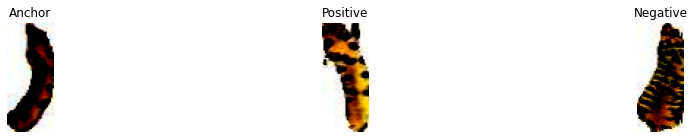

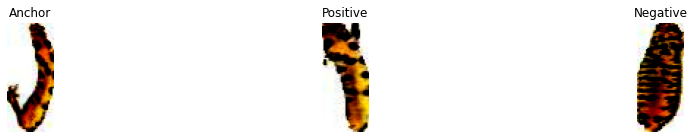

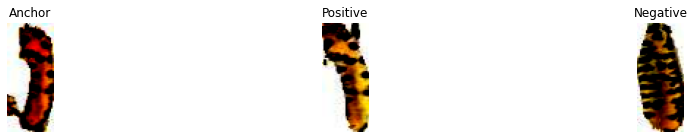

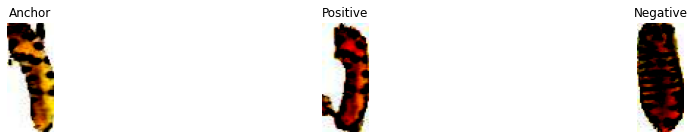

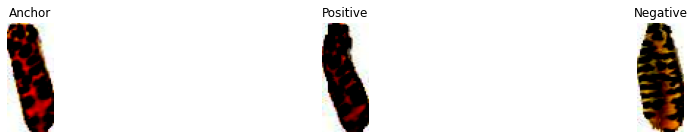

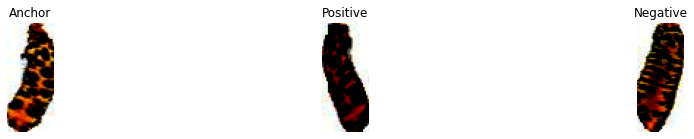

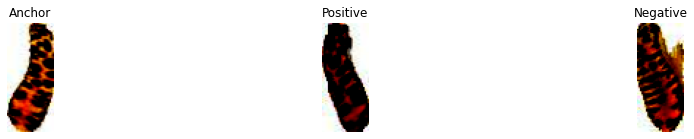

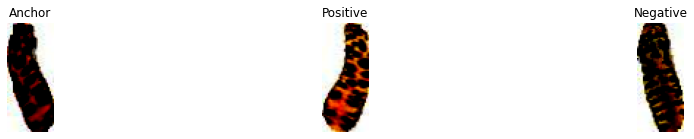

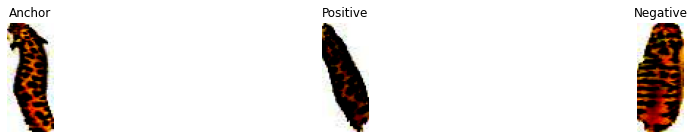

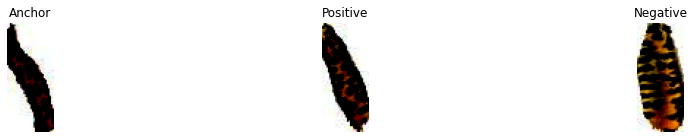

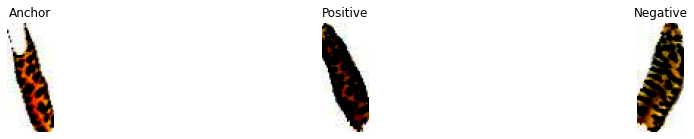

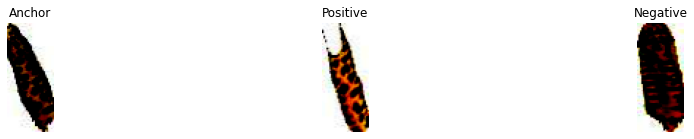

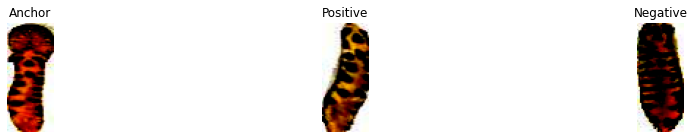

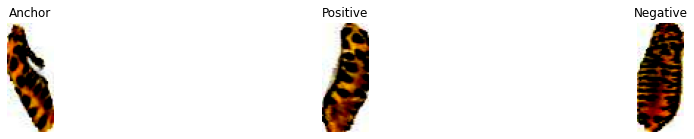

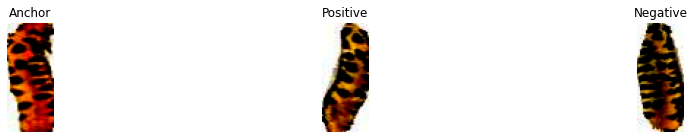

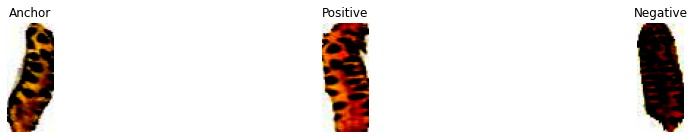

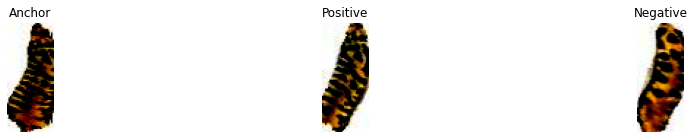

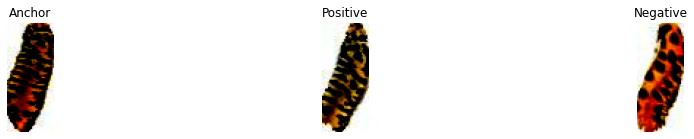

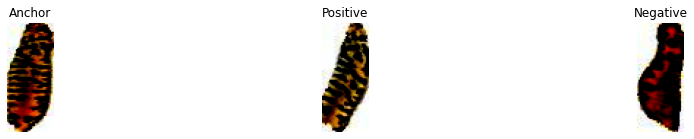

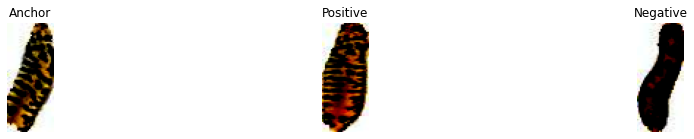

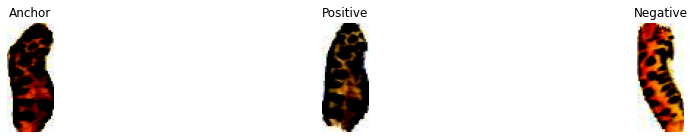

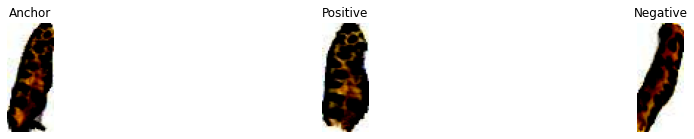

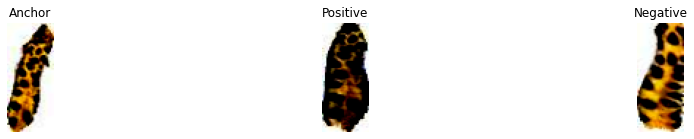

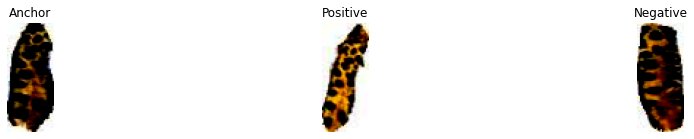

In [0]:


model = build_network(input_shape,128)


def get_batch_moderate(batch_size,network,dataset,s="train"):
    """
    Create batch of APN "moderate" triplets
    
    Arguments:
    draw_batch_size -- integer : number of initial randomly taken samples   
    hard_batchs_size -- interger : select the number of hardest samples to keep
    norm_batchs_size -- interger : number of random samples to add
    Returns:
    
    triplets -- list containing 3 tensors A,P,N of shape (hard_batchs_size+norm_batchs_size,w,h,c)
    """
    if s == 'train':
        X = dataset
    else:
        X = dataset

    m, w, h,c = X[0].shape
    
    
    #Step 1 : pick a random batch to study
    studybatch = get_batch_moderate_random(batch_size,dataset,s)
    
    
    #Compute embeddings for anchors, positive and negatives
    A = network.predict(studybatch[0])
    #print(A.shape)
    P = np.zeros((A.shape[0], A.shape[1], studybatch[1].shape[4]))
    N = np.zeros((A.shape[0], A.shape[1], studybatch[1].shape[4], studybatch[2].shape[5]))  


    for i in range(studybatch[1].shape[4]):
      P[:,:,i] = network.predict(studybatch[1][:,:,:,:,i])
     # plt.figure()
     # plt.imshow(np.squeeze(studybatch[1][0,:,:,:,i]))
      #print(studybatch[1][:,:,:,:,i])
      #if(i>0):
       # print("Pi - Pi-1")
        #print(P[:,:,i] - P[:,:,i-1])
      for j in range(studybatch[2].shape[5]):
        N[:,:,i,j] = network.predict(studybatch[2][:,:,:,:,i,j])
        #if(i>0):
         # print("Ni,j - Ni-1,j")
          #print(N[:,:,i,j] - N[:,:,i-1,j])

    
    ### Extraction des indices des distances maximales
    
    A = tf.expand_dims(A, axis = -1)
    #print(A)
    #print(P)
    dist_p = tf.math.subtract(A,P)
    #print(dist_p)
    dist_p = tf.norm(tf.math.subtract(A,P),axis = -2)
    #print(dist_p)
    selectionAP = tf.math.argmax(tf.norm(A - P,axis = -2), axis = -1)
    #print(selectionAP)
   # print(selectionAP.shape)
    #dist_p = tf.dtypes.cast(dist_p, tf.double)

    
    sub = np.zeros((A.shape[0], A.shape[1], studybatch[1].shape[4], studybatch[2].shape[5]))    
    for i in range(N.shape[3]):
      #print(A.shape)
      #print(tf.math.subtract(N[:,:,i+1,i],N[:,:,i,i]))
      sub[:,:,:,i] = tf.math.subtract(A,N[:,:,:,i])
      #print(sub[:,:,:,i])
    #A = tf.expand_dims(A, axis = -1)
    #print(sub)
    n_dist = tf.norm(sub,axis = 1)
    #print(n_dist)
    n_dist = tf.reduce_min(n_dist, axis = -2)
    #print("n_dist")
    #print(n_dist)
    selectionN = np.argmin(n_dist, axis = -1)
    #print("selectionN")
    #print(selectionN)
   # print(selectionN.shape)
    AN = tf.norm(sub,axis = -3)
    #print("AN")
    #print(AN)

    selectionPN = np.zeros((AN.shape[0]),dtype=np.int8)
    for i in range(AN.shape[0]):
      #print(AN[i,:,selectionN[i]])
      selectionPN[i] = np.argmin(AN[i,:,selectionN[i]])
      
      #print(selectionPN[i])
   # print("selectionPN")
    #print(selectionPN)
    #n_dist = tf.dtypes.cast(n_dist, tf.double)
    batch_size = studybatch[2][:,0,0,0,0,0].shape[0]
   # print(batch_size)
    width = studybatch[2][0,:,0,0,0,0].shape[0]
   # print(width)
    height = studybatch[2][0,0,:,0,0,0].shape[0]
   # print(height)
    channels = studybatch[2][0,0,0,:,0,0].shape[0]
   # print(channels)
    K = studybatch[2][0,0,0,0,:,0].shape[0]
   # print(K)
    N = studybatch[2][0,0,0,0,0,:].shape[0]
   # print(N)

    ### Création des tenseurs contenant les images sélectionnées de telles sortes à maximiser les distances AP et à minimiser les distances AN
    positives = tf.zeros((batch_size,width,height,channels))
    negatives = tf.zeros((batch_size,width,height,channels))

    #print(selectionPN)
    #print(selectionN)
    
    #print(P.shape)
    #print(N.shape)

    
    for i in range(studybatch[2][:,0,0,0,0,0].shape[0]):
      positives = studybatch[1][:,:,:,:,selectionAP[i]]
      #positives = np.squeeze(positives)
      #print(positives)
      #print(positives.shape)
      negatives = studybatch[2][:,:,:,:,selectionPN[i],selectionN[i]]
      #negatives = np.squeeze(negatives)
      #print(negatives.shape)

    #print(positives[0,:,:,0])
    #print(negatives[0,:,:,0])
    #print(positives[0,:,:,:])
    #print(negatives[0,:,:,:])
    #plt.figure()
    #plt.imshow(positives[0,:,:,0])
    #plt.figure()
    #plt.imshow(negatives[0,:,:,0])

    #studybatchloss = tf.math.reduce_sum(tf.math.log1p(tf.math.subtract(p_dist,n_dist)))
    #studybatchloss = tf.dtypes.cast(studybatchloss, tf.float32)

    triplets = [studybatch[0][:,:,:,:], positives, negatives]

    #print(NMin.shape)

    #Compute d(A,P)-d(A,N)
    #studybatchloss = np.sum(np.square(A-P),axis=1) - np.sum(np.square(A-N),axis=1)
    
    #Sort by distance (high distance first) and take the inverse
    #selection = np.argsort(studybatchloss)[::-1][:hard_batchs_size]
    
    #Draw other random samples from the batch
    #selection2 = np.random.choice(np.delete(np.arange(draw_batch_size),selection),norm_batchs_size,replace=False)
    
    #selection = np.append(selection,selection2)
    
    #triplets = [A,P,N]
    #print(triplets.shape)
    return triplets

tripletbatch = get_batch_moderate(8, model, dataset)
def drawTriplets(tripletbatch, nbmax=None):
    """display the three images for each triplets in the batch
    """
    labels = ["Anchor", "Positive", "Negative"]

    if (nbmax==None):
        nbrows = tripletbatch[0].shape[0]
    else:
        nbrows = min(nbmax,tripletbatch[0].shape[0])
                 
    for row in range(nbrows):
        fig=plt.figure(figsize=(16,2))
    
        for i in range(3):
            subplot = fig.add_subplot(1,3,i+1)
            plt.axis("off")
            triplet = tripletbatch[i][row,:,:,:]

            plt.imshow(triplet)
            subplot.title.set_text(labels[i])

drawTriplets(tripletbatch=tripletbatch)



# Triplet loss layer computing the formula introduced in the paper

**the Euclidean distance is used**

In [0]:

class TripletLossLayerModerate(layers.Layer):
    def __init__(self, **kwargs):
        #self.alpha = alpha
        super(TripletLossLayerModerate, self).__init__(**kwargs)
    
    def triplet_loss(self, inputs):
        A, P, N = inputs
        
        p_dist = tf.norm(A - P,axis = -1)
        n_dist = tf.norm(A - N,axis = -1)
        
        #tripletLoss = tf.math.reduce_sum(tf.math.add(self.alpha,tf.math.subtract(p_dist,n_dist)))

        #Utilisation de la formule de batch_hard du papier avec marge douce
        tripletLoss = tf.math.reduce_sum(tf.math.log1p(tf.math.exp(tf.math.subtract(p_dist,n_dist))))
        tripletLoss = tf.dtypes.cast(tripletLoss, tf.float32)
        #tripletLoss = backend.sum(backend.maximum(p_dist - n_dist + self.alpha, 0), axis=0)
        return(tripletLoss)
    
    def call(self, inputs):
        loss = self.triplet_loss(inputs)
        self.add_loss(loss)
        return loss



# Concatenate three instances of the same neural network representing the anchors, the positives and the negatives necessary for the triplet loss embedding algorithm

In [0]:
def build_model_moderate(input_shape, network, margin = 0.2):
    '''
    Define the Keras Model for training 
        Input : 
            input_shape : shape of input images
            network : Neural network to train outputing embeddings
            margin : minimal distance between Anchor-Positive and Anchor-Negative for the lossfunction (alpha)
    
    '''
    
    
     # Define the tensors for the three input images
    anchor_input = Input(input_shape, name="anchor_input")
    positive_input = Input(input_shape, name="positive_input")
    negative_input = Input(input_shape, name="negative_input") 
    
    # Generate the encodings (feature vectors) for the three images
    encoded_a = network(anchor_input)
    encoded_p = network(positive_input)
    encoded_n = network(negative_input)
    
    #TripletLoss Layer
    #loss_layer = TripletLossLayerModerate(alpha = margin, name='triplet_loss_layer')([encoded_a,encoded_p,encoded_n])
    loss_layer = TripletLossLayerModerate(name='triplet_loss_layer')([encoded_a,encoded_p,encoded_n])
    
    # Connect the inputs with the outputs
    network_train = Model(inputs=[anchor_input,positive_input,negative_input],outputs=loss_layer)
    
    # return the model
    return network_train



# Define metrics to evaluate the performances of the neural networks

In [0]:
def compute_dist(a,b):
    return np.sum(np.square(a-b))
#count_label = len(dataset)

def mean_average_precision(X,Y,network,rank):
    '''
    Returns
        MAP : the mean of the average precision of the model for each images of the dataset
    '''
    nb_classes = count_label
    print(nb_classes)
    m = X.shape[0]
    #nbtrain = 10
    nbevaluation = 10
    probs = np.zeros((nbevaluation))
    distances = np.zeros((nbevaluation,nb_classes))
    ypreds = np.zeros((nbevaluation,nb_classes))
    y = np.zeros((nbevaluation))

    
    #Compute all embeddings for all pics with current network
    embeddings = network.predict(X)
    
    size_embedding = embeddings.shape[1]

    ref_images = np.zeros((nb_classes,size_embedding))
    
    #generates embeddings for reference images
    for i in range(nb_classes):
          #print(dataset_train[i][:,0,0,1])
          #idx_ref = np.random.choice(dataset_train[i][:,0,0,1],size=200,replace=False)
          #print(idx_ref)
          #print(len(dataset_train[i][0]))
          #print(np.take(dataset_train[, idx_ref))
          selected_ref = dataset[i][:,:,:,:]
          #print(selected_ref.shape)
          #print(np.max(selected_ref))
          ref_images[i,:] = np.mean(network.predict(selected_ref),axis=0)
          #print(ref_images[i,:].shape)
    #print(np.mean(network.predict(selected_ref),axis=0).shape)
    
    test = compute_dist(ref_images[0,:],network.predict(np.expand_dims(dataset[15][0,:,:,:], axis=0)))
    print(test)
    for j in range(nbevaluation):
          print(j)
          for k in range(nb_classes):
              #print(X[j,:,:,:].shape)
              #print(np.max(ref_images[k,:]))
              distances[j,k] = compute_dist(ref_images[k,:],network.predict(np.expand_dims(X[j,:,:,:], axis=0)))
              #print(distances[j,k])
          #print(distances[j,:])
    #for i in range(nb_classes):
     #for k in range(nb_classes):
      #for j in range(nbevaluation):
              #print(X[j,:,:,:].shape)
       #       distances[j,k] = compute_dist(ref_images[i,:],network.predict(np.expand_dims(dataset[k][j,:,:,:], axis=0)))
        #      print(distances[j,k])
          #print(distances[j,:])
    #print("affichage des distances triées selon l'axe des classes")
    ypreds = np.argsort(distances,axis=-1)
    #print(ypreds[0])
    #print("affichage des distances triées selon l'axe des classes")
    #ypreds = np.flip(ypreds,axis = -1)
    #print(ypreds[0])
    ytrue = Y[:nbevaluation]
    #print(ytrue)

    AP = 0
    #print(len(ytrue))
    
    for i in range(len(ytrue)):
      #print(ypreds[i,:rank])
      #print(ytrue[i])
      print(ytrue)
      print(ypreds[i,0])
      for k in range(rank):
        
        if(ytrue[i] == ypreds[i,k]):
          AP += 1/(k+1)
    
    MAP = AP/len(ytrue)
    print(MAP)
    return MAP

def cumulative_matching_curve(X,Y,network,rank):
  
    '''
    Returns
        CMC : 
    '''
    nb_classes = count_label
    m = X.shape[0]
    nbtrain = 1000
    nbevaluation = 50
    probs = np.zeros((nbevaluation))
    distances = np.zeros((nbevaluation,nb_classes))
    ypreds = np.zeros((nbevaluation,nb_classes))
    y = np.zeros((nbevaluation))

    
    #Compute all embeddings for all pics with current network
    embeddings = network.predict(X)
    
    size_embedding = embeddings.shape[1]

    ref_images = np.zeros((nb_classes,size_embedding))
    
    #generates embeddings for reference images
    for i in range(nb_classes):
          #print(dataset_train[i][:,0,0,1])
          #idx_ref = np.random.choice(dataset_train[i][:,0,0,1],size=200,replace=False)
          #print(idx_ref)
          #print(len(dataset_train[i][0]))
          #print(np.take(dataset_train[, idx_ref))
          selected_ref = dataset[i][:nbtrain,:,:,:]
          #print(selected_ref.shape)
          ref_images[i,:] = np.mean(network.predict(selected_ref),axis=0)
          #print(ref_images[i,:].shape)
    #print(np.mean(network.predict(selected_ref),axis=0).shape)
    
    test = compute_dist(ref_images[0,:],network.predict(np.expand_dims(dataset[15][0,:,:,:], axis=0)))
    print(test)
    for j in range(nbevaluation):
          print(j)
          for k in range(nb_classes):
              #print(X[j,:,:,:].shape)
              distances[j,k] = compute_dist(ref_images[k,:],network.predict(np.expand_dims(X[j,:,:,:]/255, axis=0)))
              #print(distances[j,k])
          #print(distances[j,:])
    #for i in range(nb_classes):
     #for k in range(nb_classes):
      #for j in range(nbevaluation):
              #print(X[j,:,:,:].shape)
       #       distances[j,k] = compute_dist(ref_images[i,:],network.predict(np.expand_dims(dataset[k][j,:,:,:], axis=0)))
        #      print(distances[j,k])
          #print(distances[j,:])
    #print("affichage des distances triées selon l'axe des classes")
    ypreds = np.argsort(distances,axis=-1)
    #print(ypreds[0])
    #print("affichage des distances triées selon l'axe des classes")
    #ypreds = np.flip(ypreds,axis = -1)
    #print(ypreds[0])
    ytrue = Y[:nbevaluation]
    #print(ytrue)

    present = 0
    #print(len(ytrue))
    
    for i in range(len(ytrue)):
      #print(ypreds[i,:rank])
      #print(ytrue[i])
      for k in range(rank):
        #print(ytrue)
        #print(ypreds[i,k])
        if(ytrue[i] == ypreds[i,k]):
          present += 1
    
    CMC = present/len(ytrue)
    print(CMC)
    return CMC

    


def compute_interdist(network):
    '''
    Computes sum of distances between all classes embeddings on our reference test image: 
        d(0,1) + d(0,2) + ... + d(0,9) + d(1,2) + d(1,3) + ... d(8,9)
        A good model should have a large distance between all theses embeddings
        
    Returns:
        array of shape (nb_classes,nb_classes) 
    '''
    nb_classes = count_label
    res = np.zeros((nb_classes,nb_classes))
    
    ref_images = np.zeros((nb_classes,28,28,3))
    
    #generates embeddings for reference images
    for i in range(nb_classes):
        ref_images[i,:,:,:] = dataset[i][0,:,:,:]
    ref_embeddings = network.predict(ref_images)
    
    for i in range(nb_classes):
        for j in range(nb_classes):
            res[i,j] = compute_dist(ref_embeddings[i],ref_embeddings[j])
    return res

# Transfer learning using ResNet50 architecture

In [0]:
# Create the base model from the pre-trained model MobileNet V2
base_model = tf.keras.applications.ResNet50(input_shape=input_shape,
                                               include_top=False,
                                               weights='imagenet')

94773248/94765736 [==============================] - 1s 0us/step


In [0]:
feature = base_model(tf.expand_dims(image, 0))
print(feature.shape)

(1, 3, 1, 2048)


In [0]:
base_model.trainable = False

In [0]:
# Let's take a look at the base model architecture
base_model.summary()

In [0]:
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
feature_averaged = global_average_layer(feature)
print(feature_averaged.shape)

embedding_layer = tf.keras.layers.Dense(512)
normalization = tf.keras.layers.BatchNormalization()
relu = tf.keras.layers.ReLU()
embedding = embedding_layer(feature_averaged)
print(embedding.shape)

embedding_layer2 = tf.keras.layers.Dense(64)
embedding2 = embedding_layer2(embedding)
print(embedding2.shape)

(1, 2048)
(1, 512)
(1, 64)


In [0]:
model = tf.keras.Sequential([
  base_model,
  global_average_layer,
  embedding_layer,
  normalization,
  relu,
  embedding_layer2
])

Fine-tune after training with the code section below

In [0]:
#base_model.trainable = True

In [0]:
# Let's take a look to see how many layers are in the base model
print("Number of layers in the base model: ", len(base_model.layers))

# Fine-tune from this layer onwards
fine_tune_at = 100

# Freeze all the layers before the `fine_tune_at` layer
for layer in base_model.layers[:fine_tune_at]:
  layer.trainable =  False

Number of layers in the base model:  175


# Train the model

In [0]:
import time
embedding_size = 256
tf.keras.backend.clear_session()
#model = build_network(input_shape,embedding_size)
model_trained = build_model_moderate(input_shape, model)

model_trained.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005))

n_iter = 3000
t_stop = 0
iter_stop = 0
#inter_dist = compute_interdist(model)
#print(inter_dist)

In [0]:


#model_trained.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001, amsgrad=False))


if (iter_stop != 0):
  n_iteration = iter_stop
else:
  n_iteration = 0

evaluate_every = 10
n_val = 1000
print("Starting training process!")
print("-------------------------------------")

t_start = time.time()

if (t_stop != 0):
  t_start = t_stop

distribution = np.zeros((10,3))

plt.figure()
for i in range(1, n_iter+1):
    triplets = get_batch_moderate(50,model,dataset)
    #triplets = get_batch_hard(32,16,16,model)
    
    #print(triplets.shape)
    loss = model_trained.train_on_batch(triplets, None)
    n_iteration += 1
    t_stop = time.time()
    iter_stop = n_iteration

    if i % evaluate_every == 0:
        print("\n ------------- \n")
        print("[{3}] Time for {0} iterations: {1:.1f} mins, Train Loss: {2}".format(i, (time.time()-t_start)/60.0,np.nan_to_num(loss),n_iteration))
        
       # inter_dist = compute_interdist(model)
       # print(inter_dist)

        #MAP = mean_average_precision(x_train,y_train,model,1)
        #CMC = cumulative_matching_curve(x_test_origin,y_test_origin,model,5)
        #print("Mean Average Precision" + str(MAP))
        #print("Cumulative Matching Curve = " + str(CMC))
        #probs,yprob = compute_probs(model,x_test_origin[:n_val,:,:,:],y_test_origin[:n_val])
        #fpr, tpr, thresholds,auc = compute_metrics(probs, yprob)
        #model.predict(x_test_origin[:n_val,:,:,:])
        #plt.plot(fpr,tpr)
       # res = compute_interdist(model)
       # print(res)

Starting training process!
-------------------------------------

 ------------- 

[10] Time for 10 iterations: 3.3 mins, Train Loss: 79.97442626953125

 ------------- 

[20] Time for 20 iterations: 6.3 mins, Train Loss: 119.83399963378906

 ------------- 

[30] Time for 30 iterations: 9.4 mins, Train Loss: 104.28145599365234

 ------------- 

[40] Time for 40 iterations: 12.4 mins, Train Loss: 23.851720809936523

 ------------- 

[50] Time for 50 iterations: 15.4 mins, Train Loss: 42.923641204833984

 ------------- 

[60] Time for 60 iterations: 18.4 mins, Train Loss: 51.95146942138672

 ------------- 

[70] Time for 70 iterations: 21.5 mins, Train Loss: 141.24868774414062

 ------------- 

[80] Time for 80 iterations: 24.5 mins, Train Loss: 37.08208084106445

 ------------- 

[90] Time for 90 iterations: 27.5 mins, Train Loss: 159.09640502929688

 ------------- 

[100] Time for 100 iterations: 30.6 mins, Train Loss: 155.79490661621094

 ------------- 

[110] Time for 110 iterations: 

KeyboardInterrupt: ignored

<Figure size 432x288 with 0 Axes>

# Evaluate the model with the two metrics used in the paper : Mean Average Precision, and Cumulative Matching Characteristc

In [0]:
#print(dataset_train)
MAP = mean_average_precision(x_test,y_test,model,1)

557
0.255530117049789
0
1
2
3
4
5
6
7
8
9
[  0.  55. 110. 374. 524. 267. 229. 289. 532. 103.]
421
[  0.  55. 110. 374. 524. 267. 229. 289. 532. 103.]
218
[  0.  55. 110. 374. 524. 267. 229. 289. 532. 103.]
242
[  0.  55. 110. 374. 524. 267. 229. 289. 532. 103.]
385
[  0.  55. 110. 374. 524. 267. 229. 289. 532. 103.]
318
[  0.  55. 110. 374. 524. 267. 229. 289. 532. 103.]
304
[  0.  55. 110. 374. 524. 267. 229. 289. 532. 103.]
17
[  0.  55. 110. 374. 524. 267. 229. 289. 532. 103.]
289
[  0.  55. 110. 374. 524. 267. 229. 289. 532. 103.]
80
[  0.  55. 110. 374. 524. 267. 229. 289. 532. 103.]
289
0.1


In [0]:
CMC = cumulative_matching_curve(x_test,y_test,model,3)